In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy.ma as ma

%matplotlib inline
%config InlineBackend.figure_format = "retina"
from tqdm import tqdm

from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["font.size"] = 20

from lsst.rsp import get_tap_service, retrieve_query
service = get_tap_service()

from astropy.cosmology import WMAP9 as cosmo
import astropy.units as u
from tqdm import tqdm 

In [3]:
# create the TAP service client
service = get_tap_service()

# we will all use the same input coordinates and radii
center_coords = "62, -37"

radius_deg = 1 # degrees

In [99]:
# coords and radius (in deg)
center_coords = "62, -37"
rad = 30

results = service.search("SELECT TOP 100000 *"
                         "FROM dp02_dc2_catalogs.DiaObject "
                         "WHERE CONTAINS(POINT('ICRS', ra, decl), "
                         f"CIRCLE('ICRS', {center_coords}, {rad})) = 1 "
                        "AND uPSFluxChi2 > 0 "
                        "AND gPSFluxChi2 > 0 "
                        "AND rPSFluxChi2 > 0 "
                        "AND iPSFluxChi2 > 0 "
                        "AND zPSFluxChi2 > 0 "
                        "AND yPSFluxChi2 > 0 ")

table = results.to_table()

In [100]:
len(table)

100000

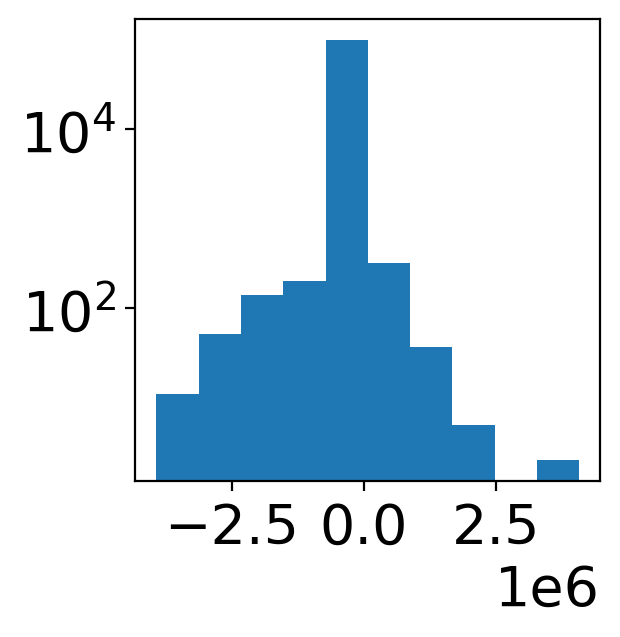

In [101]:
plt.figure(figsize=(3,3))
_ = plt.hist(table['uPSFluxPercentile05'], bins=10)
plt.yscale('log')

Text(0, 0.5, 'rPSF_Percentile50')

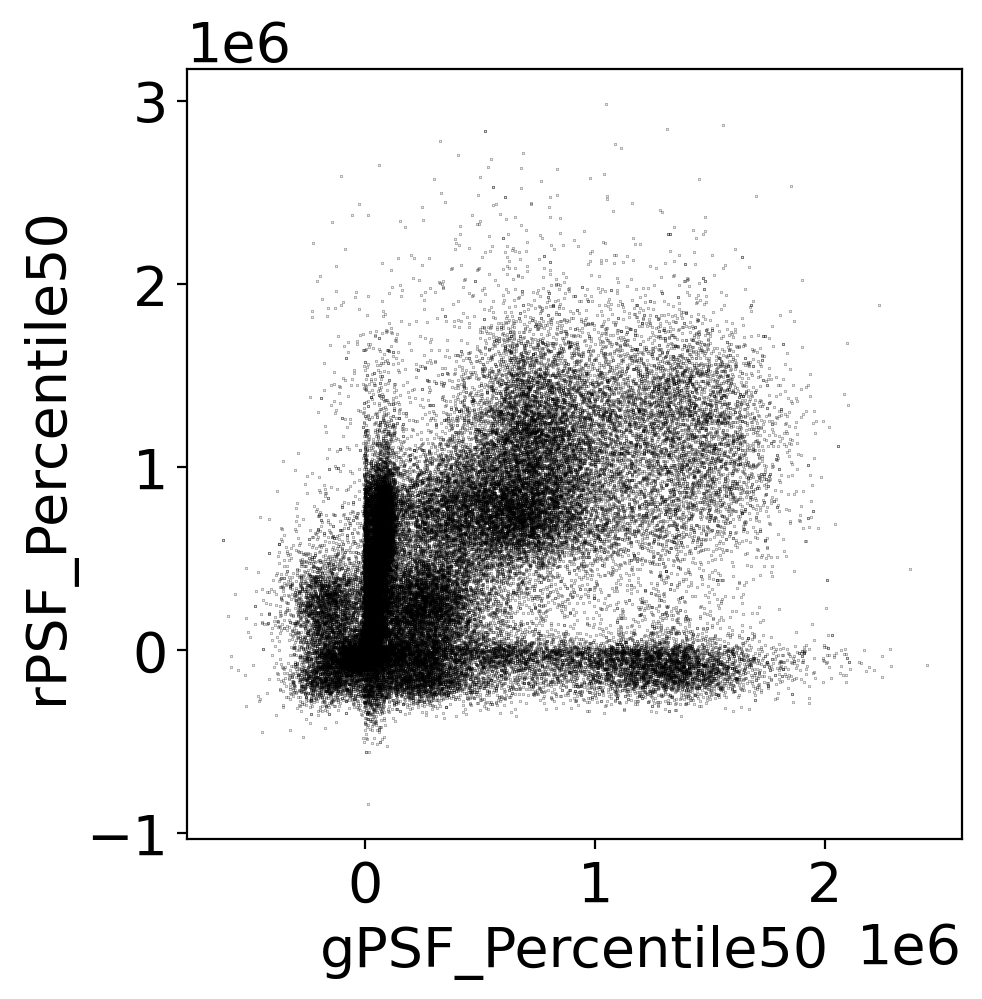

In [102]:
plt.figure(figsize=(5,5))
plt.scatter(table['gPSFluxPercentile50'], table['rPSFluxPercentile50'], 
           s=0.01, color='k')
plt.xlabel('gPSF_Percentile50')
plt.ylabel('rPSF_Percentile50')


Text(0, 0.5, 'rPSF_Percentile50')

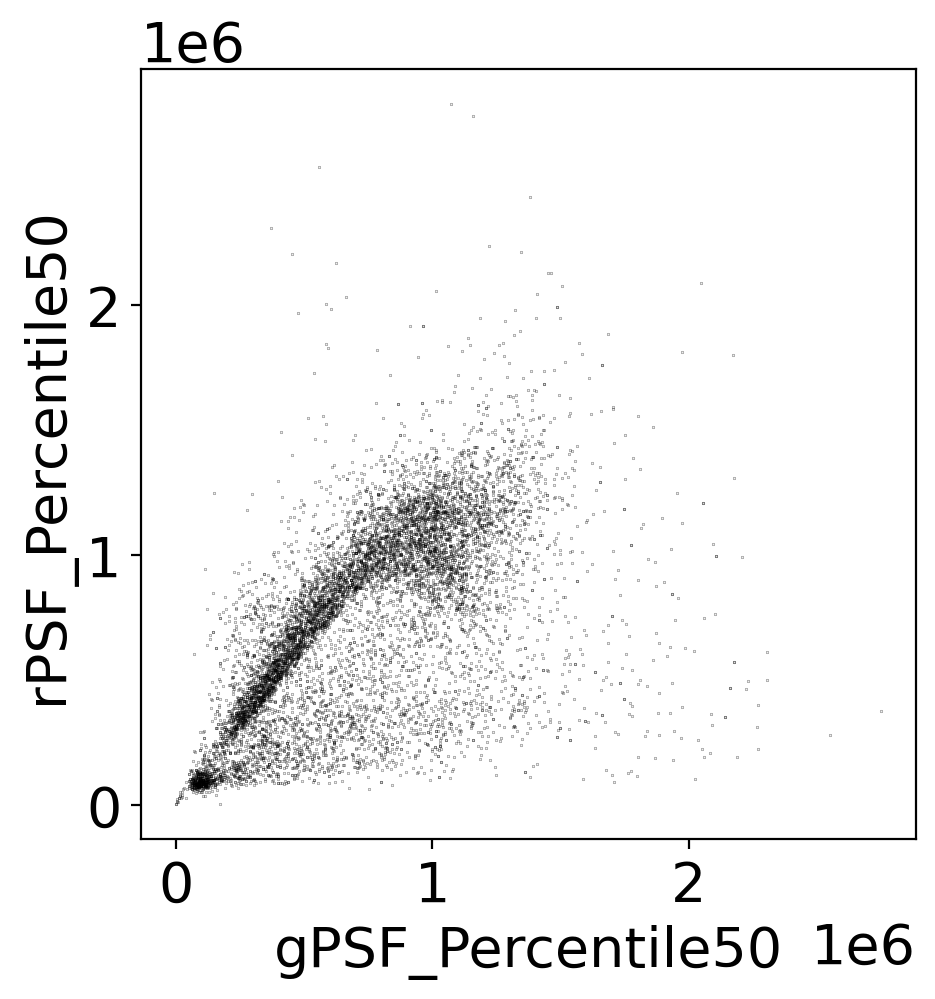

In [59]:
plt.figure(figsize=(5,5))
plt.scatter(table['gTOTFluxMean'], table['rTOTFluxMean'], 
           s=0.01, color='k')
plt.xlabel('gPSF_Percentile50')
plt.ylabel('rPSF_Percentile50')

In [82]:
import matplotlib
cm = matplotlib.cm.get_cmap('rainbow')

Text(0.5, 0, 'Total PSF Flux')

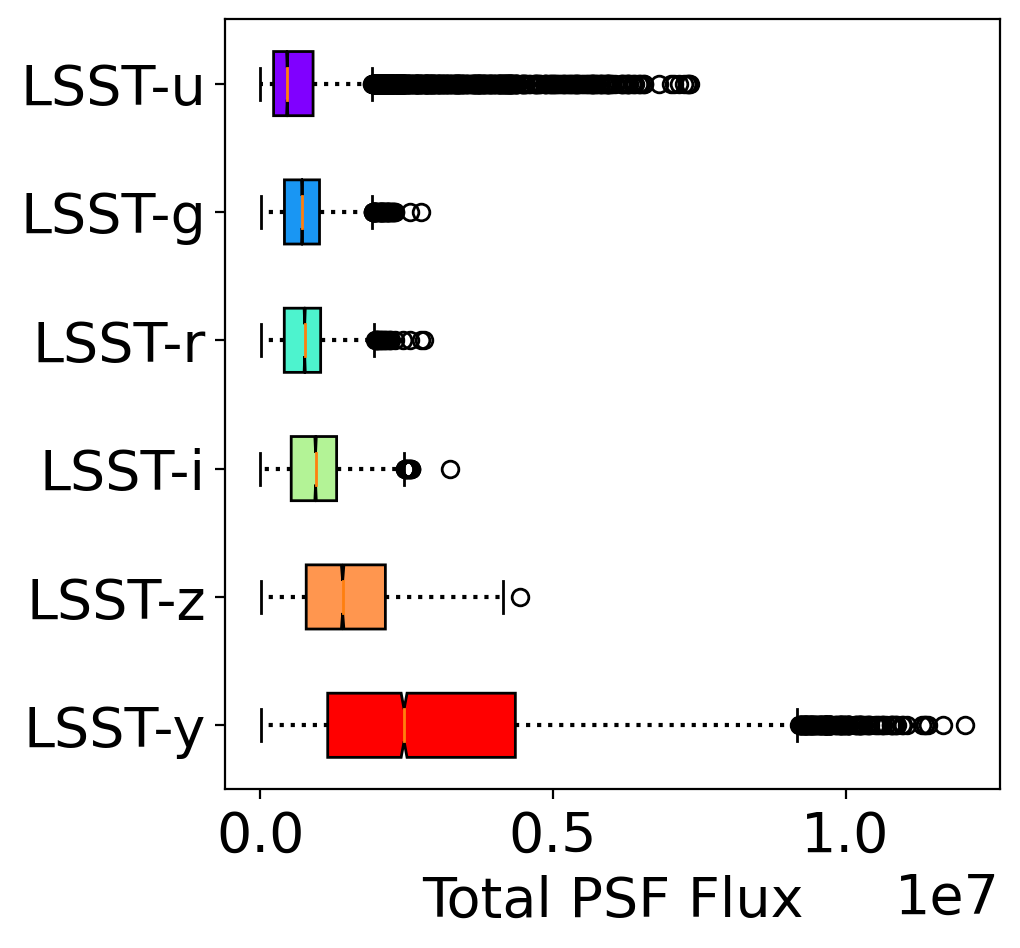

In [94]:
# Creating axes instance
fig = plt.figure(figsize =(5, 5))
ax = fig.add_subplot(111)

bp = ax.boxplot([table['uTOTFluxMean'], table['gTOTFluxMean'], 
                table['rTOTFluxMean'], table['iTOTFluxMean'],
                table['zTOTFluxMean'], table['yTOTFluxMean']], patch_artist = True, vert = 0, notch=True)
 
 
inx = 0
for patch in (bp['boxes']):
    patch.set_facecolor(cm(inx))
    inx += 0.2
    
    
for whisker in bp['whiskers']:
    whisker.set(color ='k',
                linewidth = 1.5,
                linestyle =":")
    
    
labs = [f"LSST-{flt}" for flt in list('ugrizy')]
# x-axis labels
_ = ax.set_yticklabels(labs)
ax.set_ylim(ax.set_ylim()[::-1])
ax.set_xlabel('Total PSF Flux')

Text(0.5, 0, '$\\sigma$')

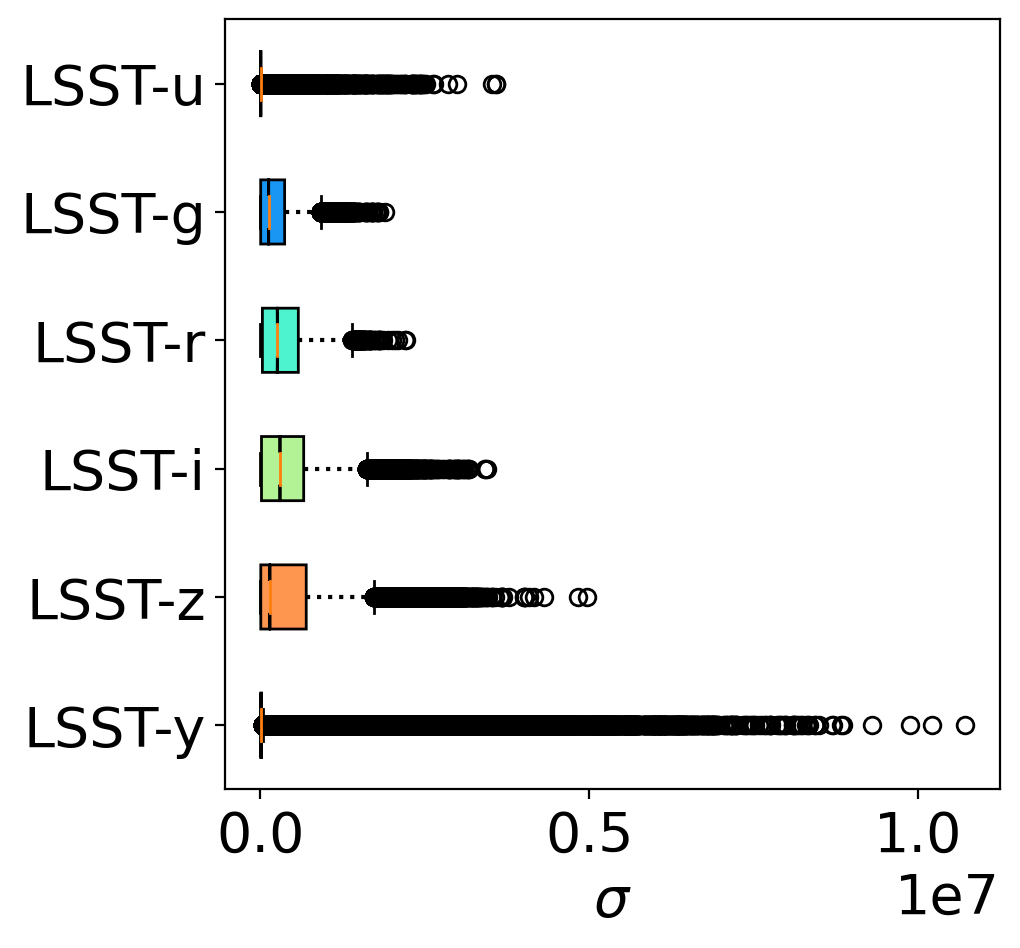

In [113]:



# Creating axes instance
fig = plt.figure(figsize =(5, 5))
ax = fig.add_subplot(111)

bp = ax.boxplot([table['uPSFluxSigma'], table['gPSFluxSigma'], 
                table['rPSFluxSigma'], table['iPSFluxSigma'],
                table['zPSFluxSigma'], table['yPSFluxSigma']], patch_artist = True, vert = 0, notch=True)
 
 
inx = 0
for patch in (bp['boxes']):
    patch.set_facecolor(cm(inx))
    inx += 0.2
        
for whisker in bp['whiskers']:
    whisker.set(color ='k',
                linewidth = 1.5,
                linestyle =":")
    
labs = [f"LSST-{flt}" for flt in list('ugrizy')]
# x-axis labels
_ = ax.set_yticklabels(labs)
ax.set_ylim(ax.set_ylim()[::-1])
#ax.set_xscale('log')
ax.set_xlabel("$\sigma$")

In [116]:
table['uPSFluxSigma'].data.data

array([11557.0850086, 22469.9092688,  6398.6081221, ...,  2543.4330548,
        2213.8952009, 25611.8034951])

In [126]:
pp = np.percentile(table['gPSFluxSigma'], [25, 50, 75])

In [176]:
def calc_iqr_thresh(dat):
    """Calculate the IQR and the IQR range"""
    
    pp = pp = np.percentile(dat, [25, 50, 75])
    
    # IQR
    iqr = pp[-1] - pp[0]
    
    return pp[0] - 3*iqr, pp[-1] + 3*iqr
    
    

In [177]:
lim_a, lim_b = calc_iqr_thresh(table['gPSFluxSigma'])

In [178]:
a = np.where((table['gPSFluxSigma']<=lim_a) | (table['gPSFluxSigma']>=lim_b))

In [179]:
for b in list('ugrizy'):
    lim_a, lim_b = calc_iqr_thresh(table[f'{b}PSFluxSigma'])
    a = np.where((table[f'{b}PSFluxSigma']<=lim_a) | (table[f'{b}PSFluxSigma']>=lim_b))
    print (f'lsst-{b}:',len(table[f'{b}PSFluxSigma'][a])/len(table[f'{b}PSFluxSigma']) * 100)

lsst-u: 3.6220000000000003
lsst-g: 0.027999999999999997
lsst-r: 0.0
lsst-i: 0.042
lsst-z: 0.329
lsst-y: 14.111


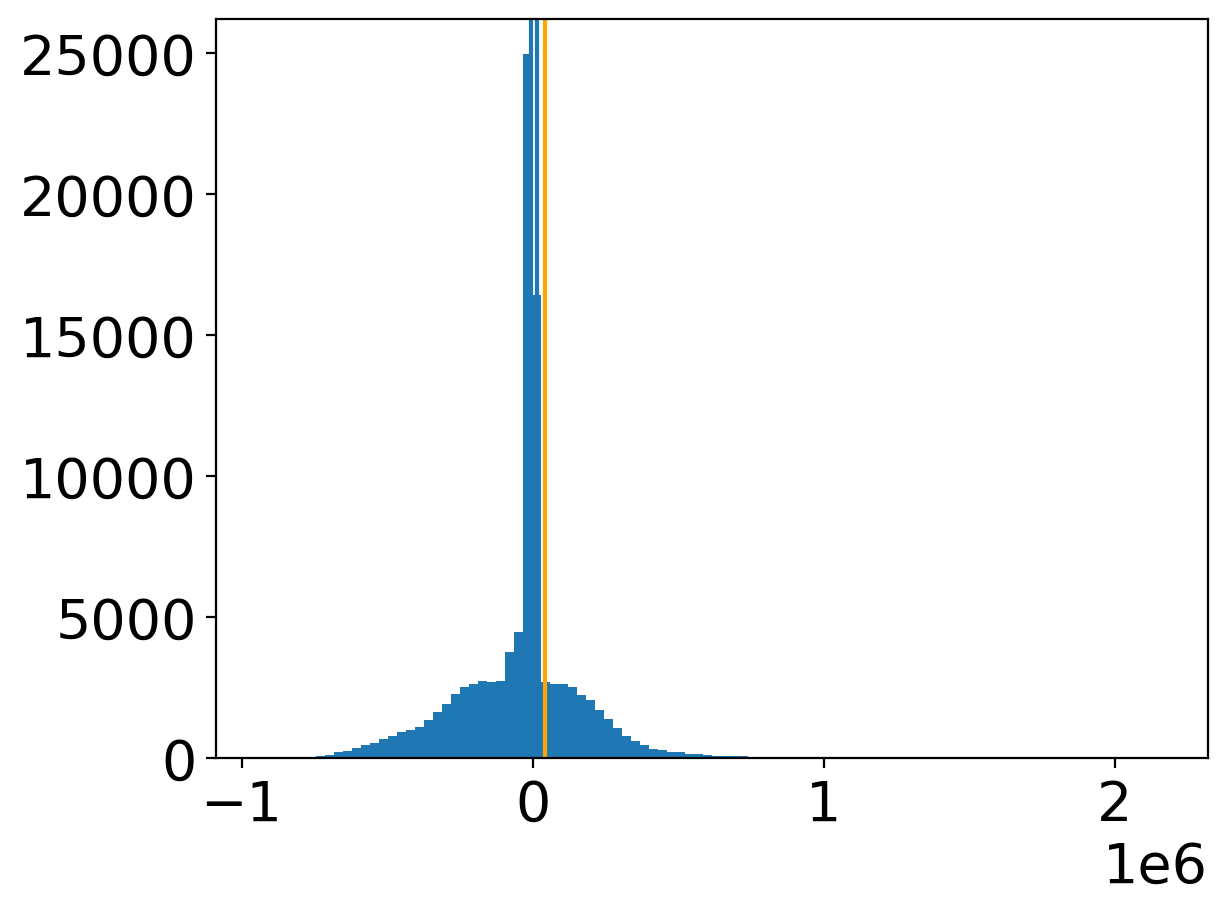

In [190]:
_ = plt.hist(table['gPSFluxPercentile05'], bins=100)
plt.axvline(np.percentile(table['gPSFluxPercentile05'], [50]))
plt.axvline(np.percentile(table['gPSFluxPercentile05'], [75]))
plt.axvline(3*np.percentile(table['gPSFluxPercentile05'], [75]), color='orange')




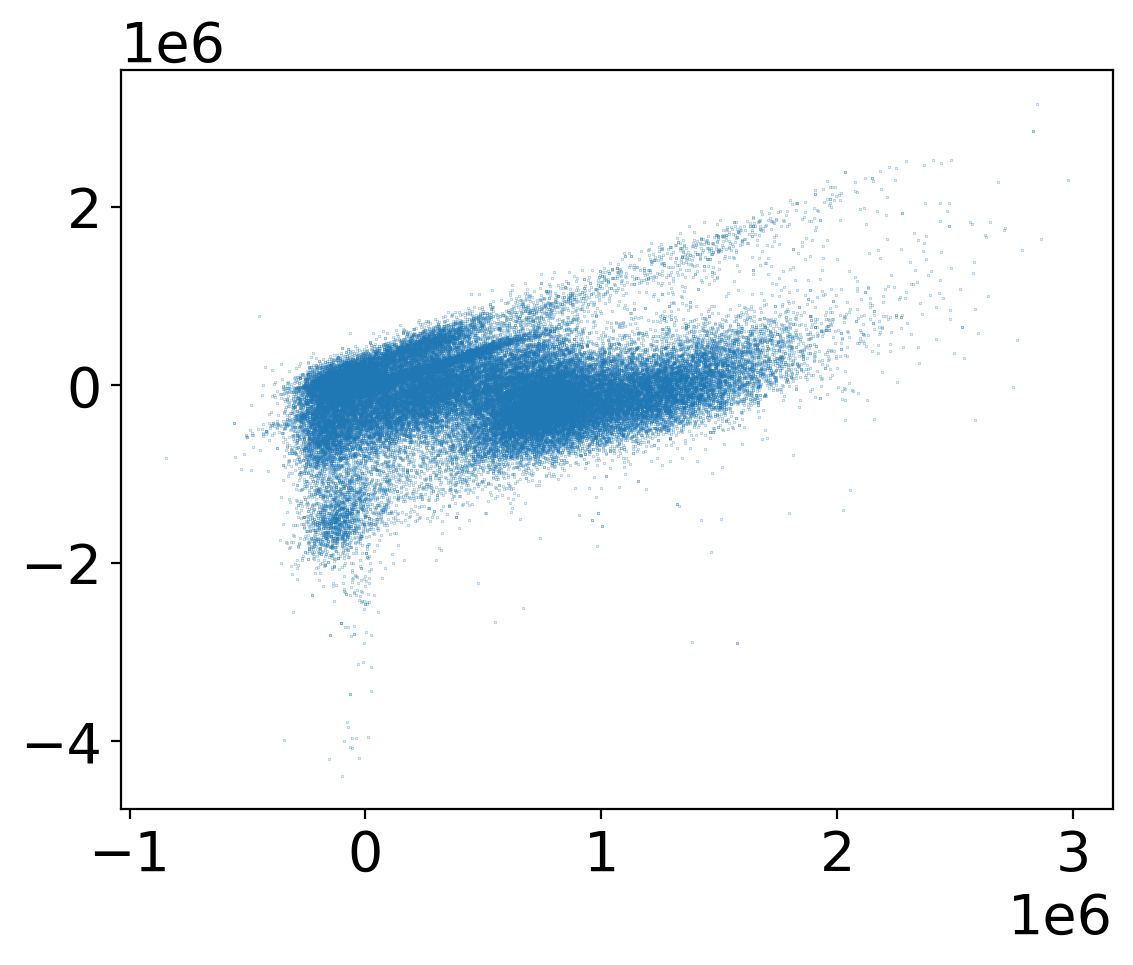

In [196]:
plt.scatter(table['rPSFluxPercentile50'], table['rPSFluxPercentile50']-table['iPSFluxPercentile50'], s=0.01)

In [370]:
# coords and radius (in deg)
center_coords = "62, -37"
rad = 50

results = service.search("SELECT ra, decl, gPSFluxSigma, rPSFluxSigma, nDiaSources, "
                         "uPSFluxNdata, gPSFluxNdata, rPSFluxNdata, iPSFluxNdata, zPSFluxNdata, yPSFluxNdata, "
                         "scisql_nanojanskyToAbMag(uPSFluxMax) as u_psf_mag, "
                         "scisql_nanojanskyToAbMag(gPSFluxMax) as g_psf_mag, "
                         "scisql_nanojanskyToAbMag(rPSFluxMax) as r_psf_mag, "
                         "scisql_nanojanskyToAbMag(iPSFluxMax) as i_psf_mag, "
                         "scisql_nanojanskyToAbMag(zPSFluxMax) as z_psf_mag, "
                         "scisql_nanojanskyToAbMag(yPSFluxMax) as y_psf_mag "
                         #"scisql_nanojanskyToAbMagSigma(uPSFluxPercentile50, uPSFluxErrMean) as u_psf_err, "
                         #"scisql_nanojanskyToAbMagSigma(gPSFluxPercentile50, gPSFluxErrMean) as g_psf_err, "
                         #"scisql_nanojanskyToAbMagSigma(rPSFluxPercentile50, rPSFluxErrMean) as r_psf_err, "
                         #"scisql_nanojanskyToAbMagSigma(iPSFluxPercentile50, iPSFluxErrMean) as i_psf_err, "
                         #"scisql_nanojanskyToAbMagSigma(zPSFluxPercentile50, zPSFluxErrMean) as z_psf_err, "
                         #"scisql_nanojanskyToAbMagSigma(yPSFluxPercentile50, yPSFluxErrMean) as y_psf_err "
                         "FROM dp02_dc2_catalogs.DiaObject "
                         "WHERE CONTAINS(POINT('ICRS', ra, decl), "
                         f"CIRCLE('ICRS', {center_coords}, {rad})) = 1 "
                        "AND uPSFluxChi2 > 0 "
                        "AND gPSFluxChi2 > 0 "
                        "AND rPSFluxChi2 > 0 "
                        "AND iPSFluxChi2 > 0 "
                        "AND zPSFluxChi2 > 0 "
                        "AND yPSFluxChi2 > 0 ")

table = results.to_table()

/tmp/ipykernel_860/3945434389.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  plt.scatter(table['g_psf_mag']-table['r_psf_mag'], table['g_psf_mag'],


Text(0, 0.5, 'g$_{50}$')

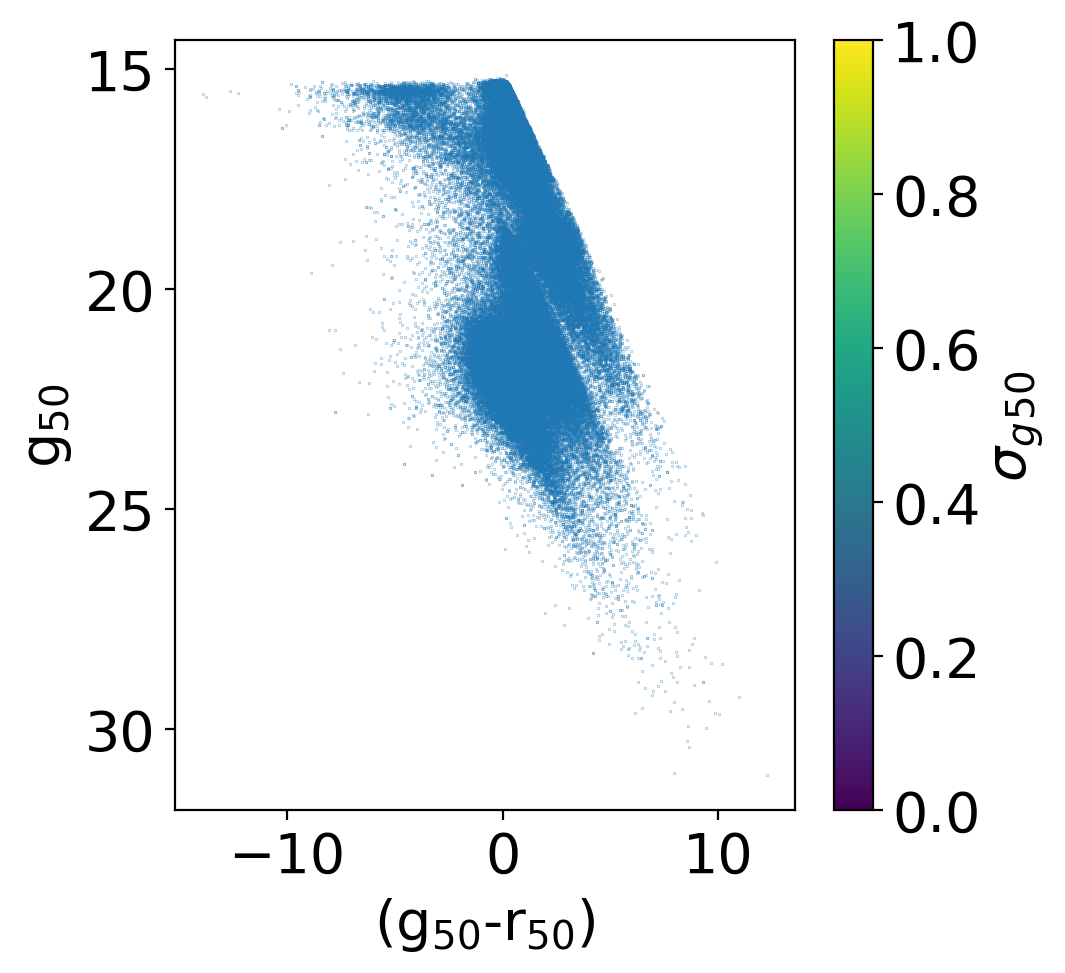

In [371]:
plt.figure(figsize=(5,5))
plt.scatter(table['g_psf_mag']-table['r_psf_mag'], table['g_psf_mag'], 
           vmin=0, 
           vmax=1, 
           s=0.01, cmap='jet')

plt.ylim(plt.ylim()[::-1])
plt.colorbar(label='$\sigma$$_{g}$$_{50}$')
plt.xlabel('(g$_{50}$-r$_{50}$)')
plt.ylabel('g$_{50}$')

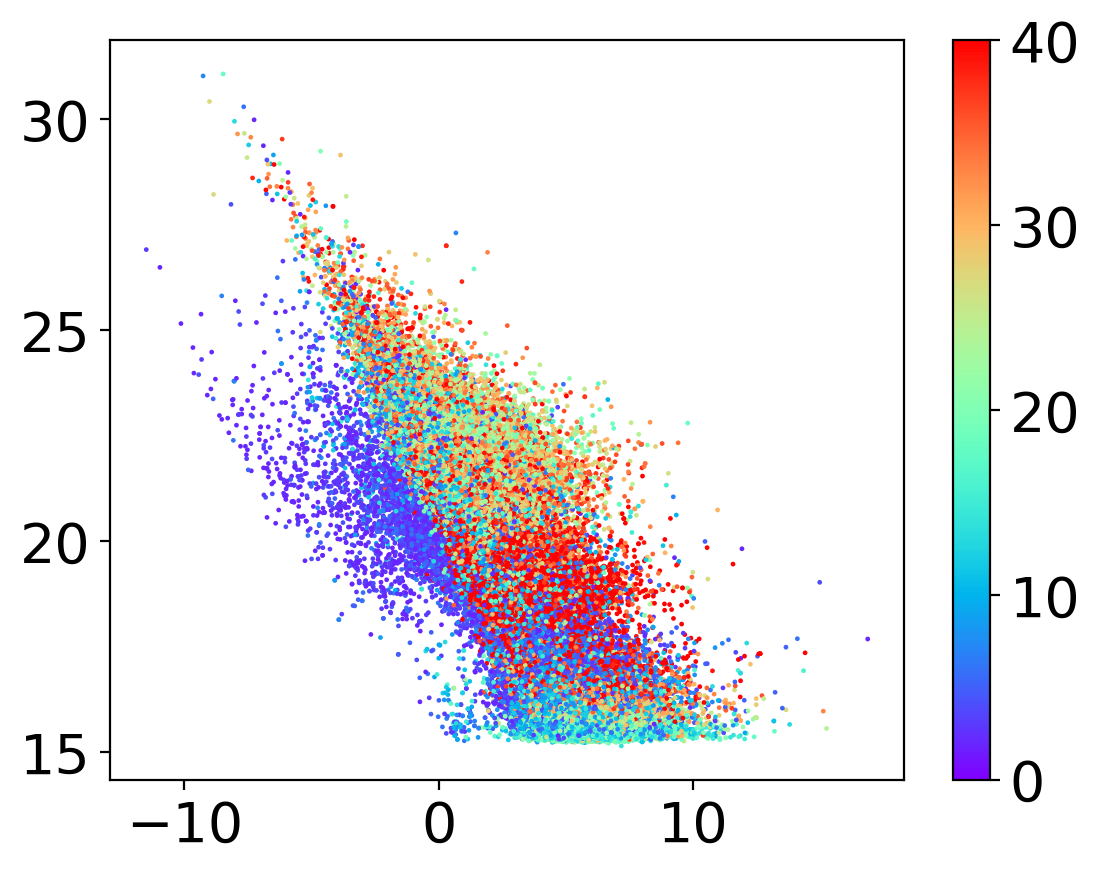

In [372]:
plt.scatter(table['u_psf_mag']-table['g_psf_mag'], table['g_psf_mag'], c=table['gPSFluxNdata'], 
           vmin=0, vmax=40, 
           cmap='rainbow', s=0.5)
plt.colorbar()

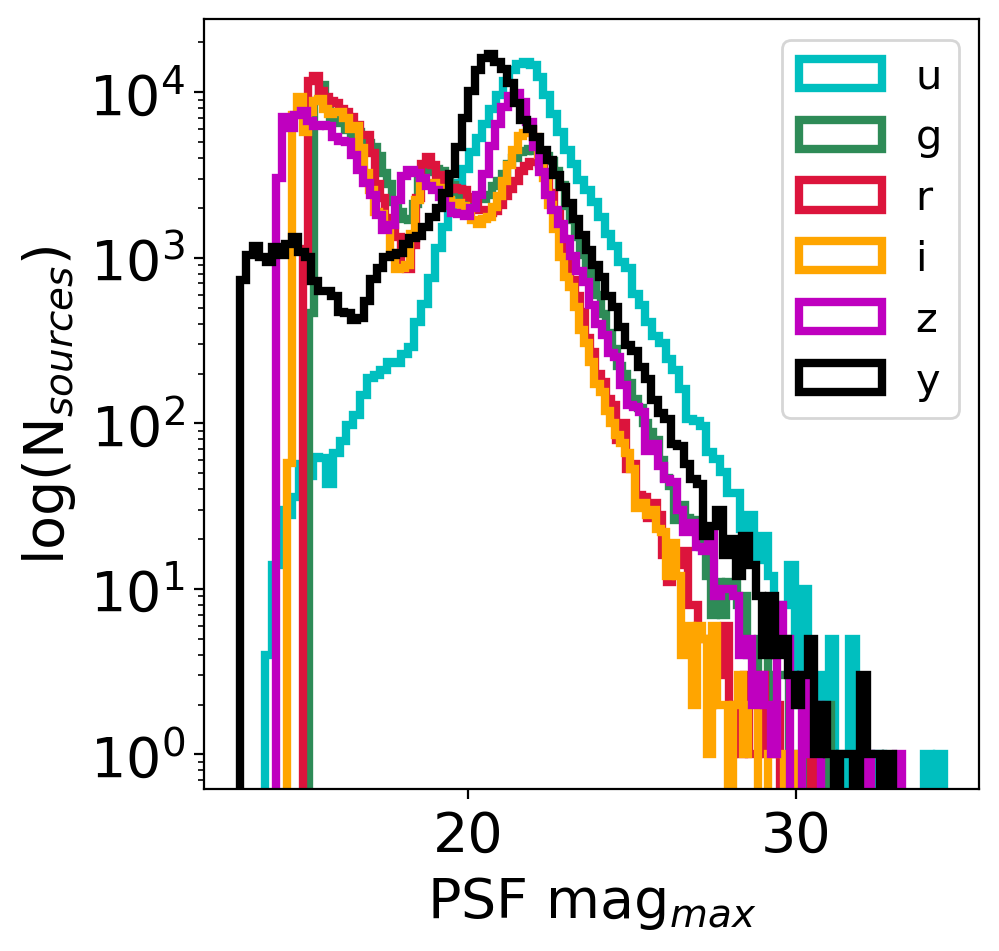

In [373]:
plt.figure(figsize=(5,5))
_ = plt.hist(table['u_psf_mag'], bins=100,histtype='step',color='c', lw=3, label='u')
_ = plt.hist(table['g_psf_mag'], bins=100,histtype='step', color='seagreen', lw=3, label='g')
_ = plt.hist(table['r_psf_mag'], bins=100,histtype='step', color='crimson', lw=3, label='r')
_ = plt.hist(table['i_psf_mag'], bins=100,histtype='step', color='orange', lw=3, label='i')
_ = plt.hist(table['z_psf_mag'], bins=100,histtype='step', color='m', lw=3, label='z')
_ = plt.hist(table['y_psf_mag'], bins=100,histtype='step', color='k', lw=3, label='y')
plt.yscale('log')
plt.xlabel('PSF mag$_{max}$')
plt.ylabel("log(N$_{sources}$)")
plt.legend(fontsize=15)

100%|██████████| 6/6 [01:12<00:00, 12.04s/it]


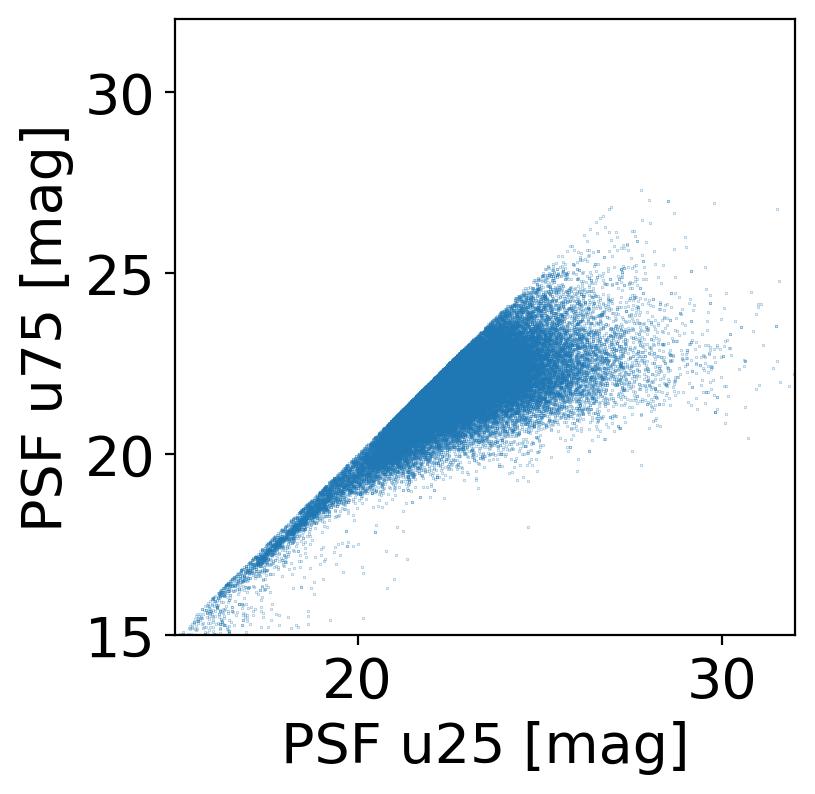

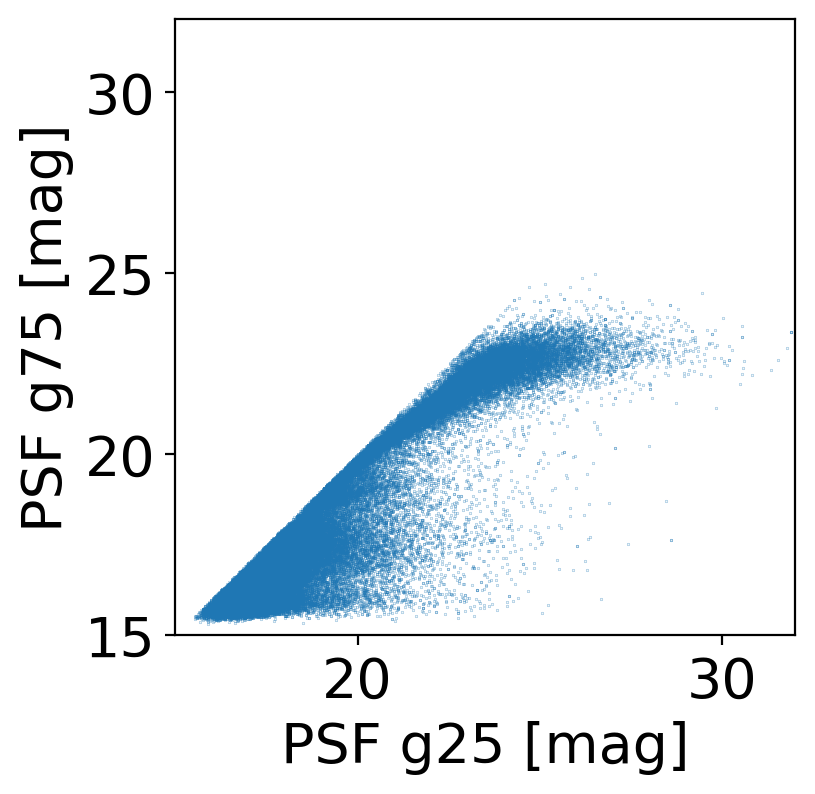

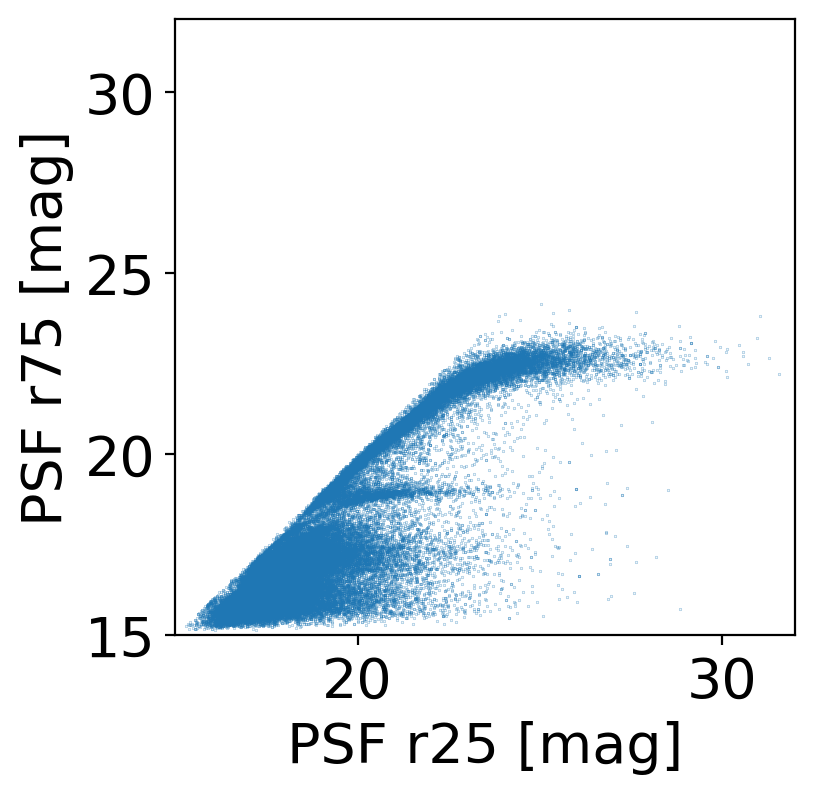

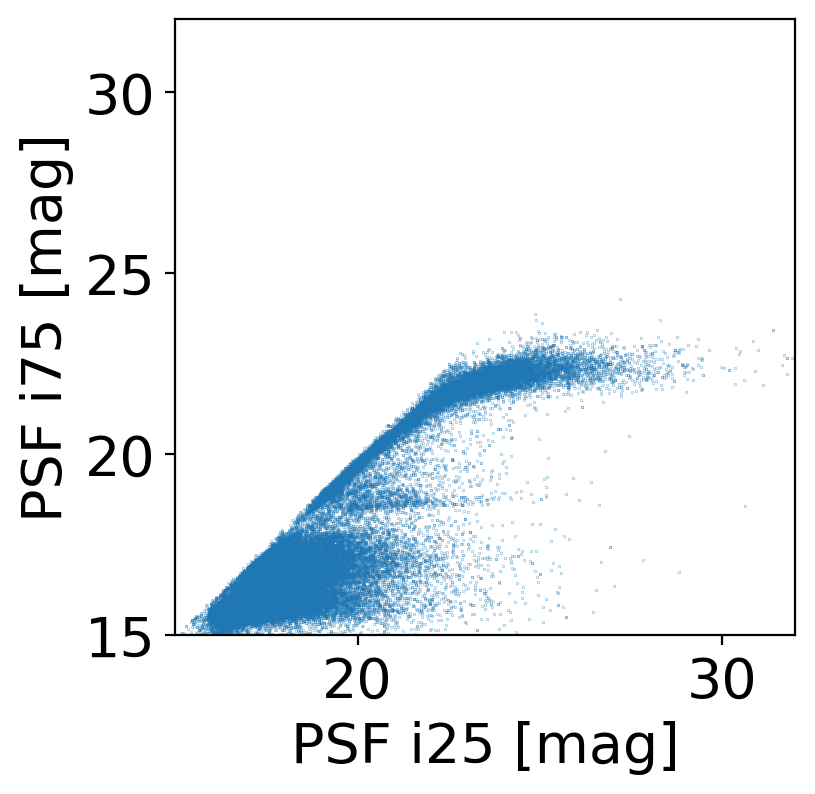

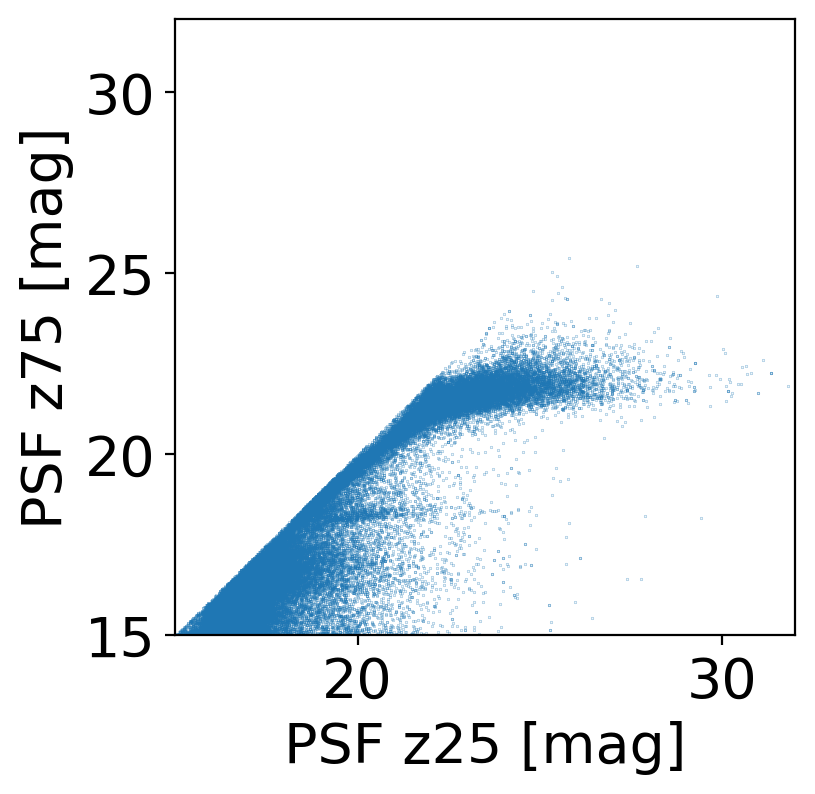

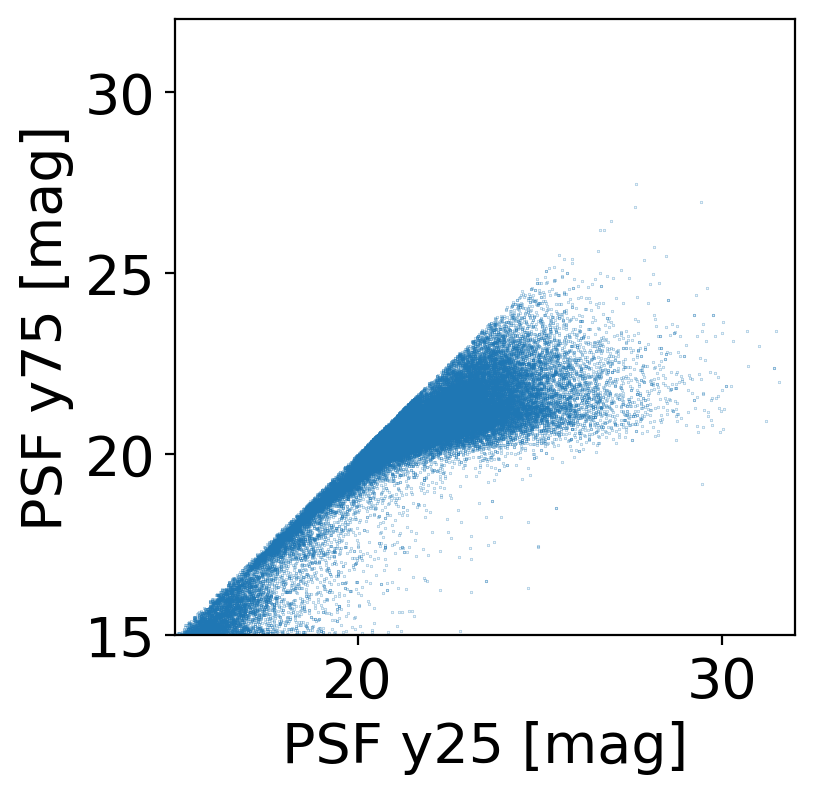

In [419]:
for flt in tqdm(list('ugrizy')):

    r1 = service.search("SELECT ra, decl, gPSFluxSigma, rPSFluxSigma, nDiaSources, "
                             "uPSFluxNdata, gPSFluxNdata, rPSFluxNdata, iPSFluxNdata, zPSFluxNdata, yPSFluxNdata, "
                             f"scisql_nanojanskyToAbMag({flt}PSFluxPercentile25) as {flt}25, "
                             f"scisql_nanojanskyToAbMag({flt}PSFluxPercentile75) as {flt}75 "
                             "FROM dp02_dc2_catalogs.DiaObject "
                             "WHERE CONTAINS(POINT('ICRS', ra, decl), "
                             f"CIRCLE('ICRS', {center_coords}, {rad})) = 1 "
                            "AND uPSFluxChi2 > 0 "
                            "AND gPSFluxChi2 > 0 "
                            "AND rPSFluxChi2 > 0 "
                            "AND iPSFluxChi2 > 0 "
                            "AND zPSFluxChi2 > 0 "
                            "AND yPSFluxChi2 > 0 ").to_table()

    plt.figure(figsize=(4,4))
    plt.scatter(r1[f'{flt}25'], r1[f'{flt}75'], s=0.01)
    plt.xlabel(f'PSF {flt}25 [mag]')
    plt.ylabel(f'PSF {flt}75 [mag]')
    plt.xlim(15, 32)
    plt.ylim(15, 32)

In [4]:
from sklearn.preprocessing import StandardScaler

In [166]:
df

gmin       gmax  Ndet         g5        g25        g50  \
10      21.184344  15.977647  25.0  19.200521  18.133455  17.563418   
26      19.800431  16.210990  27.0  18.181104  17.698179  16.947908   
50      19.065959  15.736267  26.0  18.043761  17.431484  16.842974   
51      17.889069  16.142707  35.0  17.833739  17.113608  16.797853   
78      20.132195  15.654118  19.0  18.702460  17.634522  17.191325   
...           ...        ...   ...        ...        ...        ...   
216422  18.976446  15.734062   5.0  18.699478  18.002233  17.234103   
216426  20.355207  15.304784  52.0  19.239210  17.248858  16.297886   
216439  19.224483  15.946483  19.0  18.503650  18.064022  17.689293   
216459  24.269031  21.205683  71.0  23.679403  22.827518  22.305538   
216508  19.178091  15.410163  55.0  18.111416  17.197293  16.291255   

              g75        g95   rPSFluxSigma  rPSFluxSkew  rPSFluxStetsonJ  
10      17.119271  16.105992  392439.790994     1.561783       238.163491  
26      16.472784  16.215229  365055.059837     0.252767       247.847389  
50      16.122124  15.901857  510338.225169     0.456117       362.506612  
51      16.200119  16.158609  369070.721743    -0.000259       260.857083  
78      16.609503  15.760162  552680.371498     1.296817       317.900681  
...           ...        ...            ...          ...              ...  
216422  17.061894  15.899243  700777.068567     1.871494       399.714903  
216426  15.871511  15.317378  904765.053641     0.515725       574.126006  
216439  16.696091  15.980576  476705.394356     1.102648       327.298954  
216459  22.055347  21.575972    2297.415187     0.908288         1.817937  
216508  15.986247  15.417591  729060.820940     0.547254       458.403375  

[14768 rows x 11 columns]

In [152]:
import pandas as pd
rad = 50

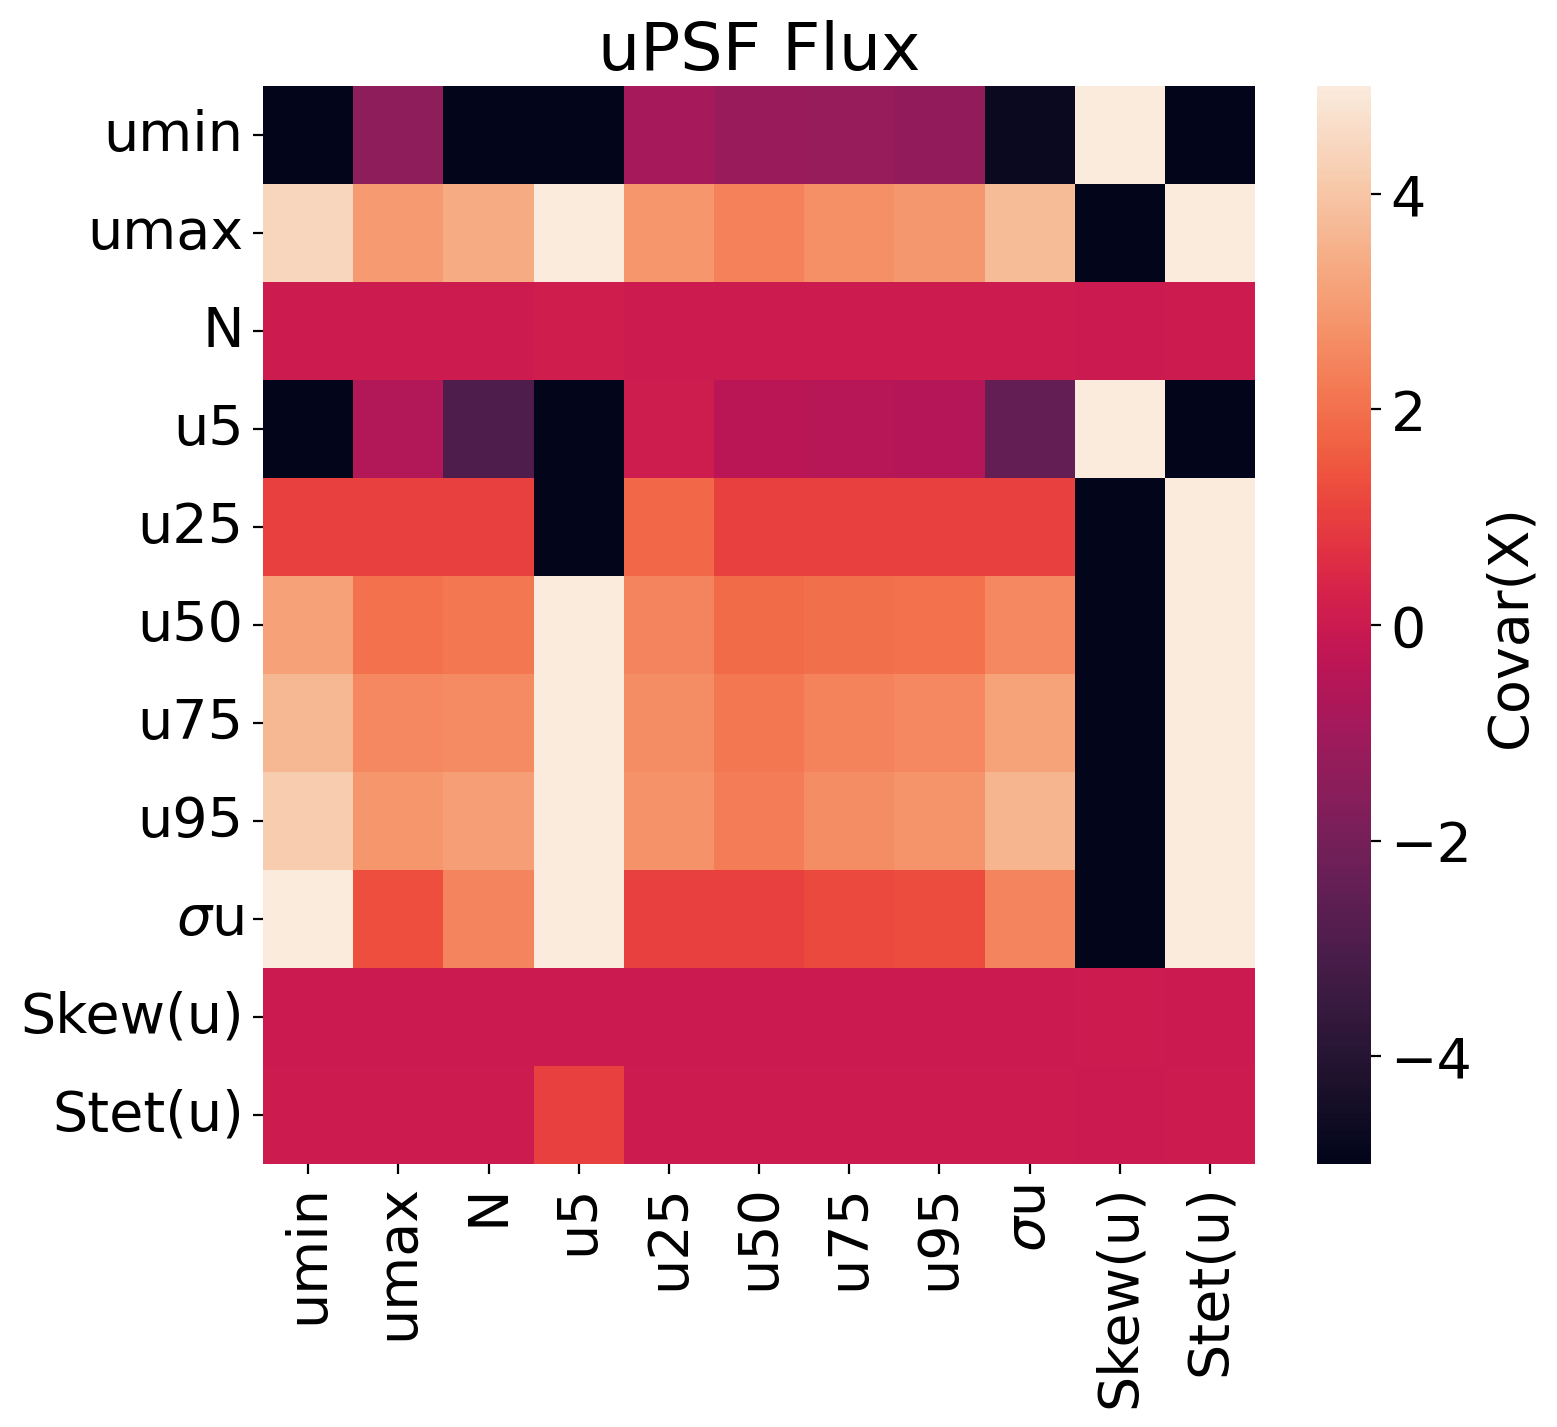

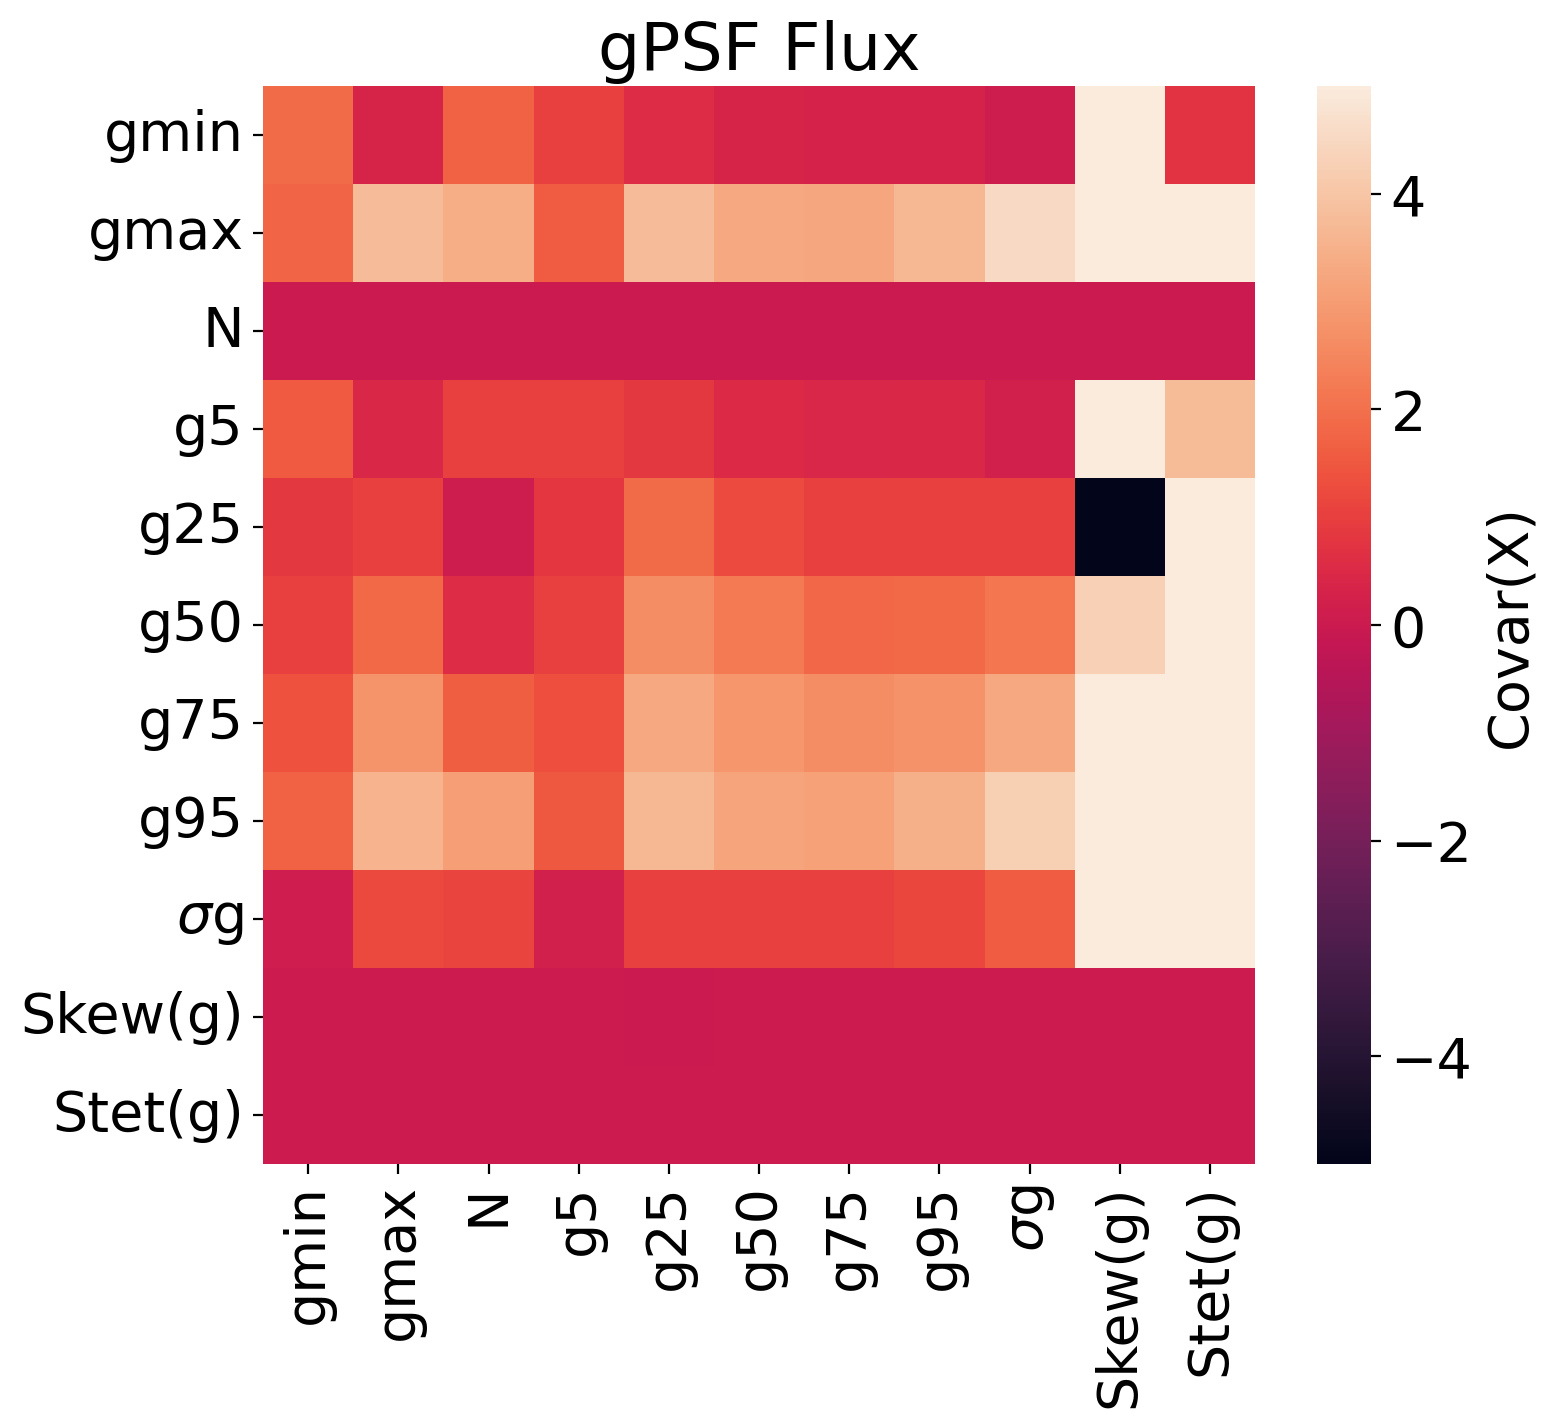

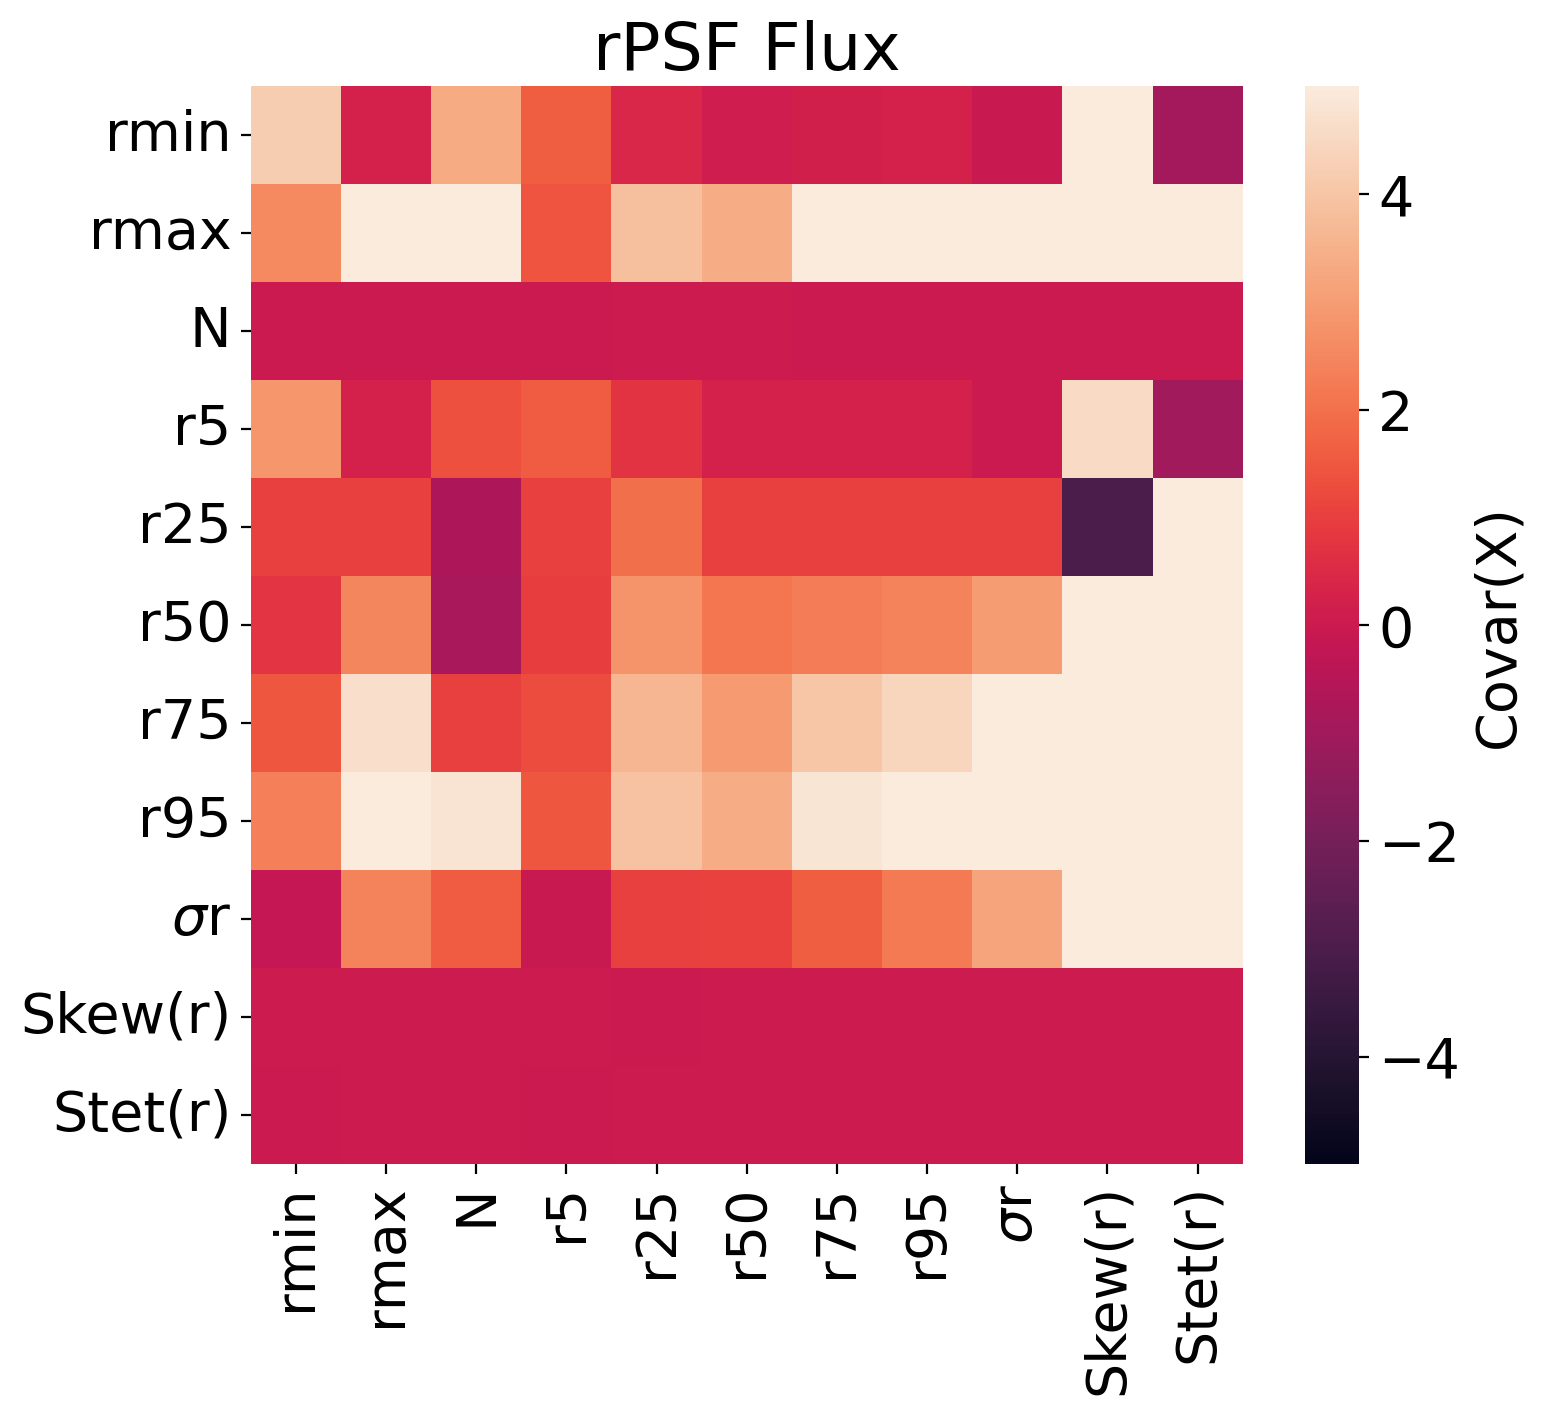

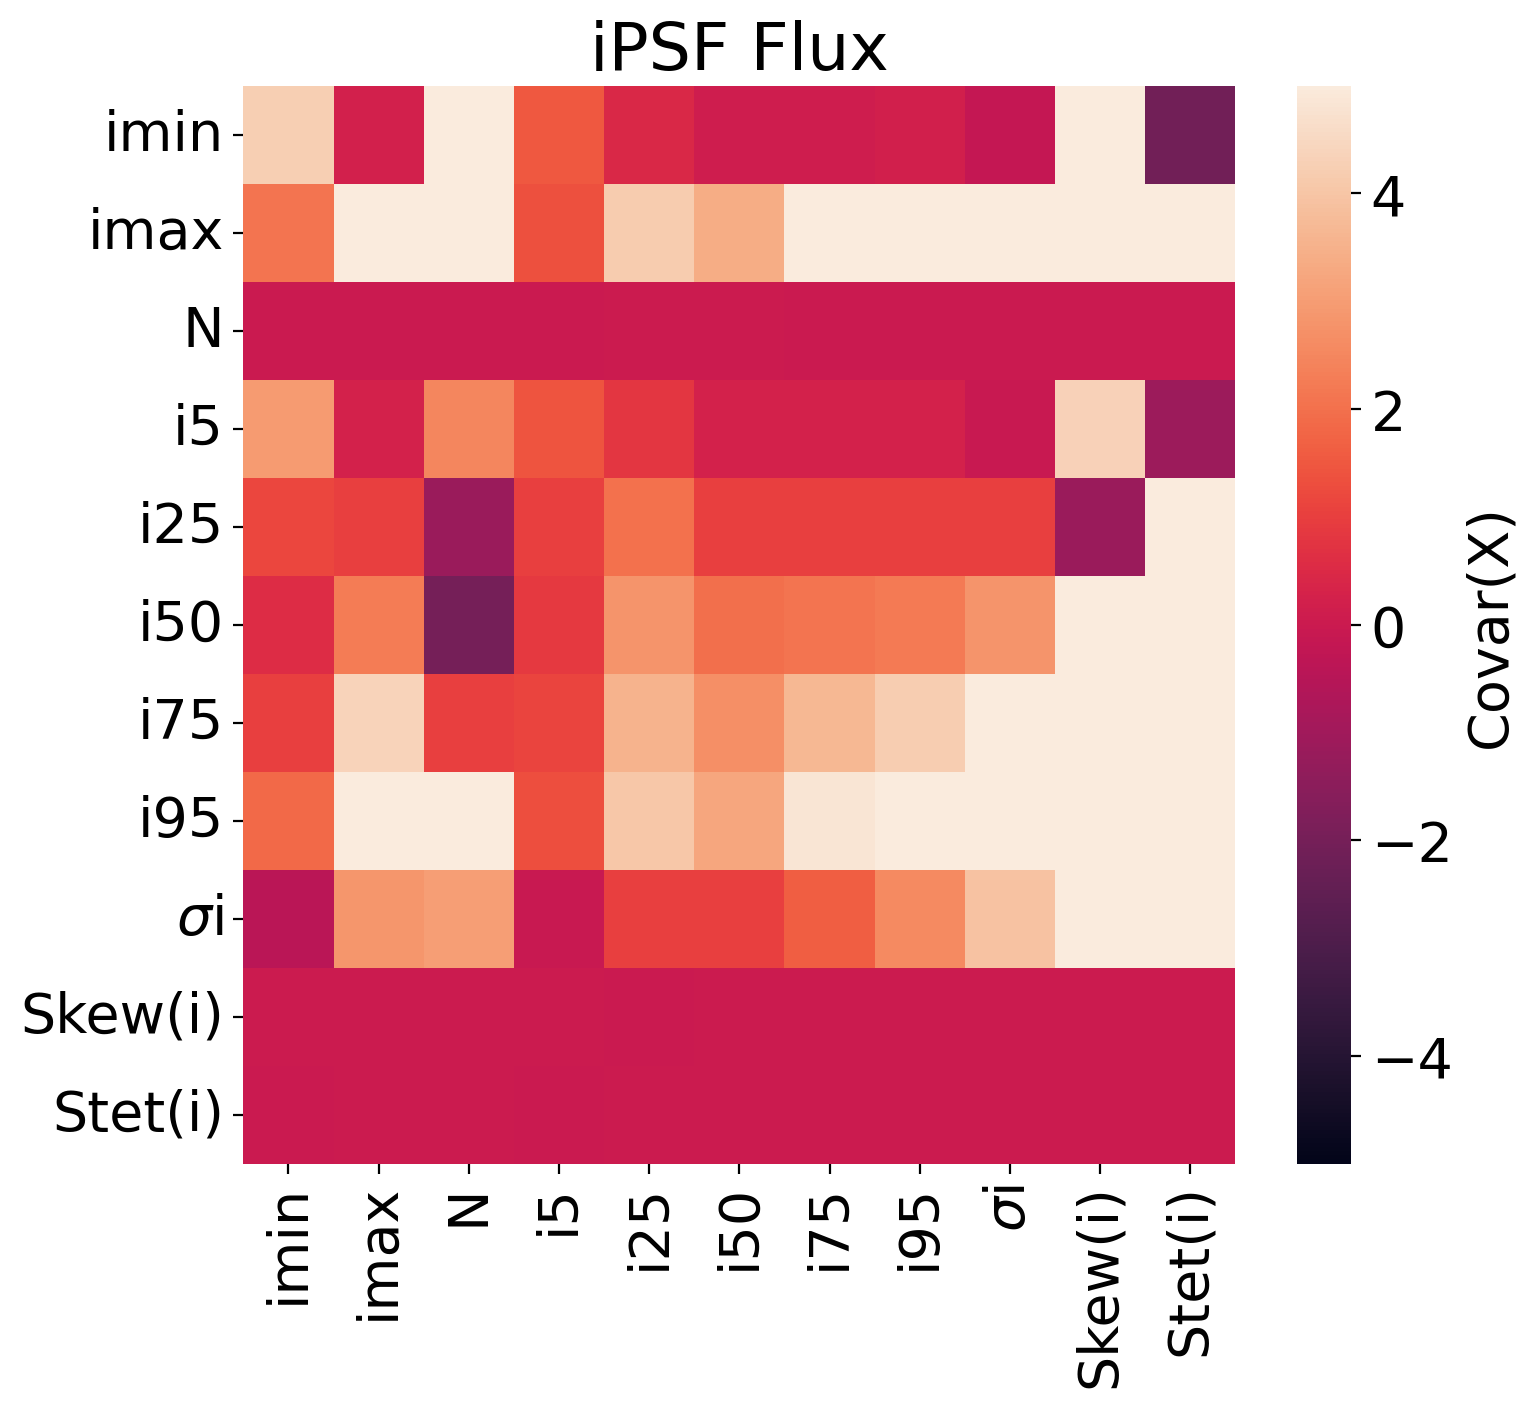

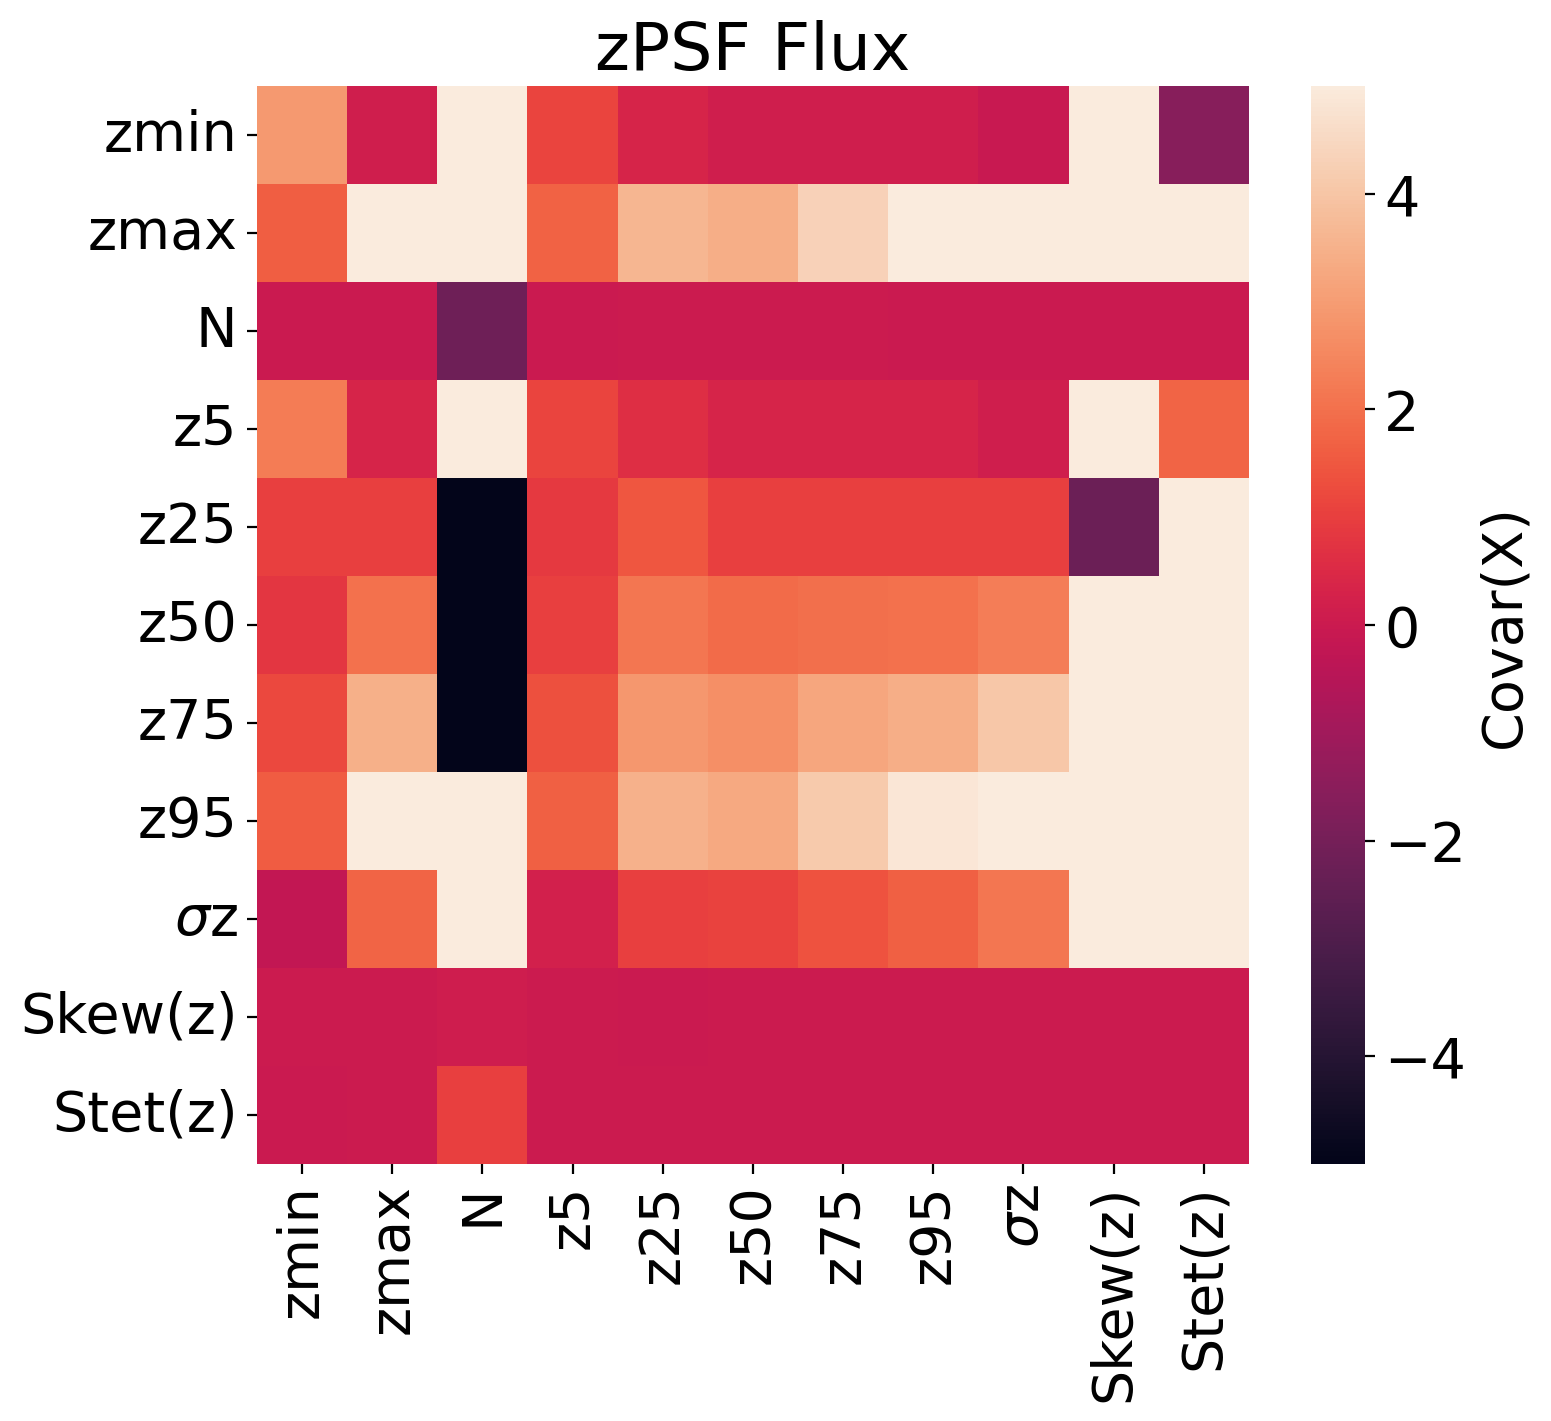

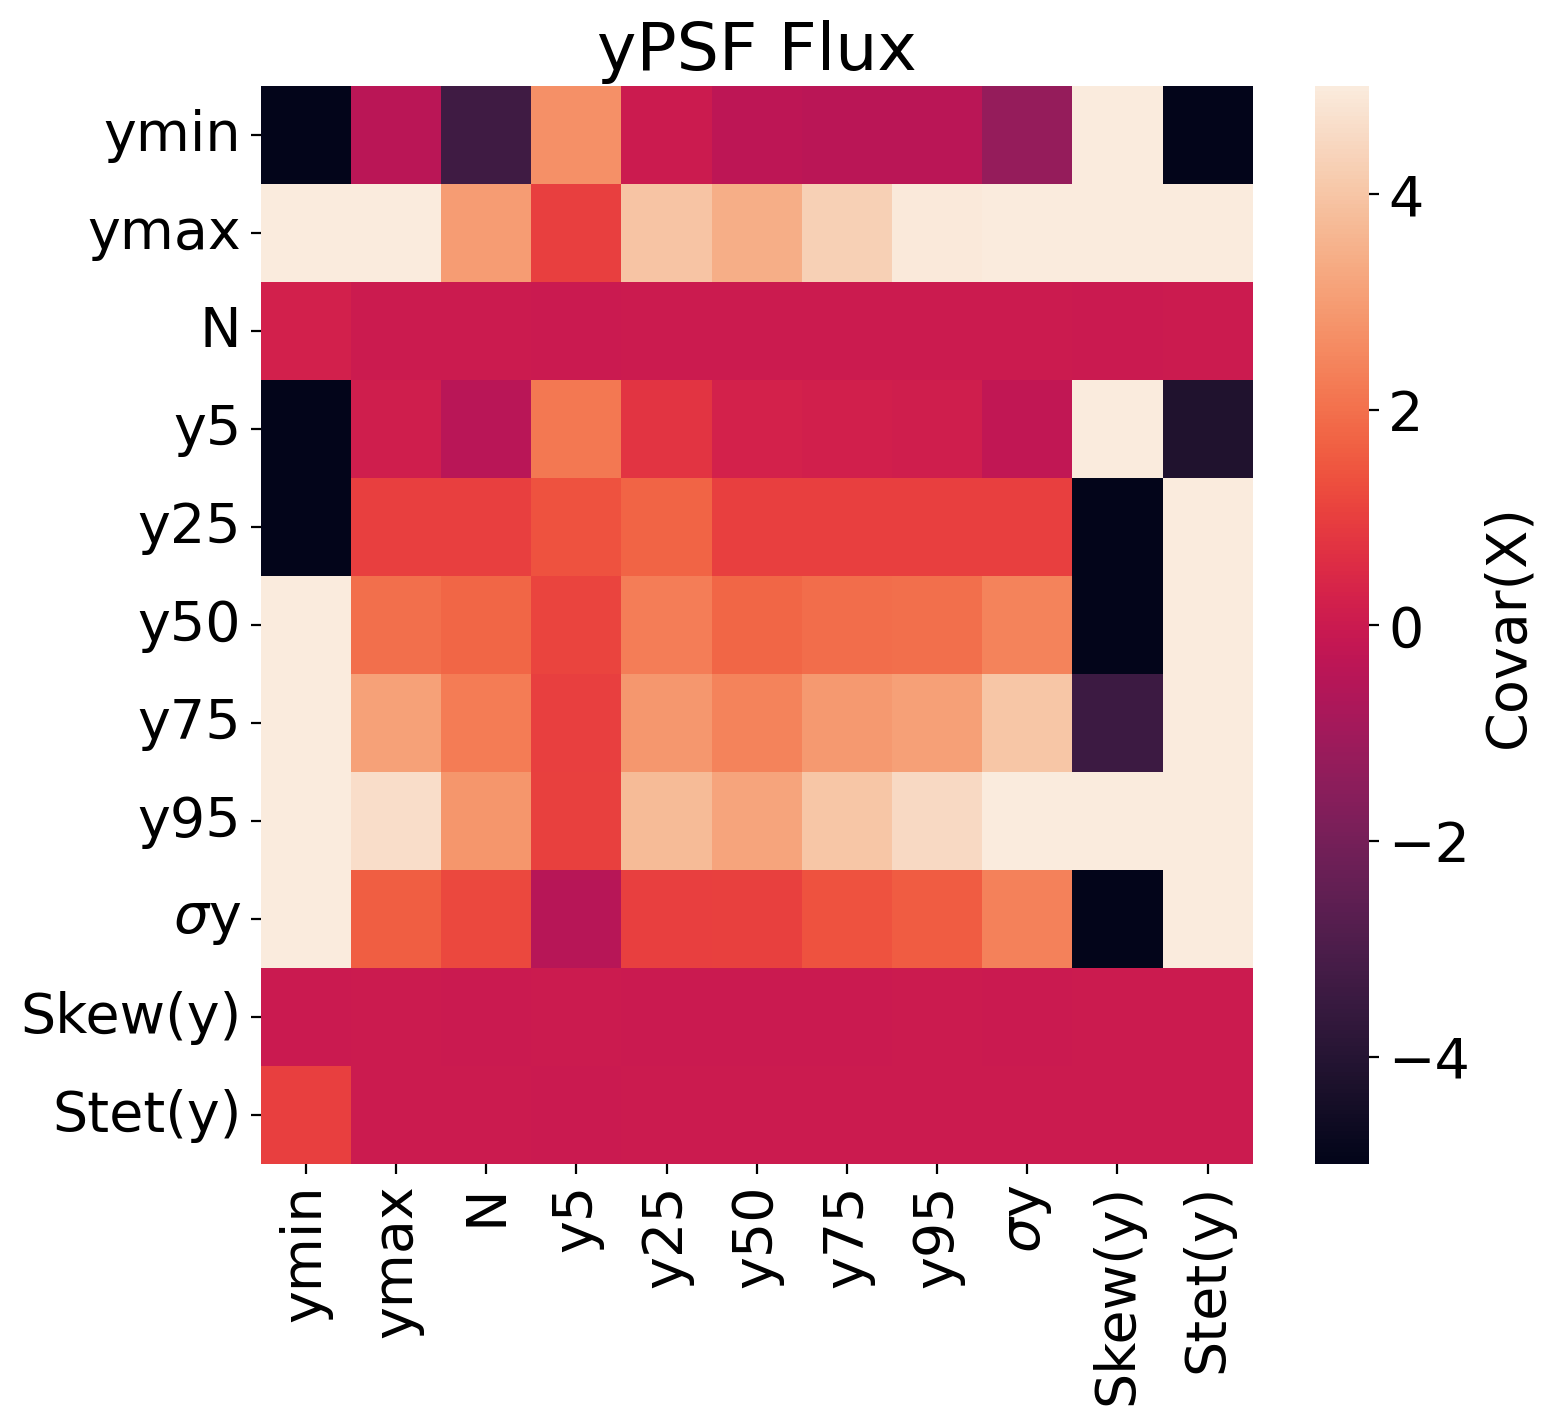

In [212]:
for flt in list('ugrizy'):
    r1 = service.search("SELECT "
                        f"{flt}PSFluxMin AS gmin, "
                        f"{flt}PSFluxMax AS gmax, "
                        f"{flt}PSFluxNdata AS Ndet, "
                        f"{flt}PSFluxPercentile05  AS g5, "
                        f"{flt}PSFluxPercentile25 AS g25, "
                        f"{flt}PSFluxPercentile50 AS g50, "
                        f"{flt}PSFluxPercentile75 AS g75, "
                        f"{flt}PSFluxPercentile95 AS g95, "
                        f"{flt}PSFluxSigma, {flt}PSFluxSkew, {flt}PSFluxStetsonJ "
                         "FROM dp02_dc2_catalogs.DiaObject "
                         "WHERE CONTAINS(POINT('ICRS', ra, decl), "
                         f"CIRCLE('ICRS', {center_coords}, {rad})) = 1 "
                        "AND uPSFluxChi2 > 0 "
                        "AND gPSFluxChi2 > 0 "
                        "AND rPSFluxChi2 > 0 "
                        "AND iPSFluxChi2 > 0 "
                        "AND zPSFluxChi2 > 0 "
                        "AND yPSFluxChi2 > 0 ").to_table()
    df = r1.to_pandas()
    df = df.dropna()
    
    cc = df.cov()
    
    # Normalize manually
    cc[f'{flt}PSFluxStetsonJ'] = (cc[f'{flt}PSFluxStetsonJ']/np.max(cc[f'{flt}PSFluxStetsonJ'])) * 100
    cc[f'{flt}PSFluxSkew'] = (cc[f'{flt}PSFluxSkew']/np.max(cc[f'{flt}PSFluxSkew'])) * 100
    cc['gmin'] = cc['gmin']/np.median(cc['gmin']) 
    cc['gmax'] = cc['gmax']/np.median(cc['gmax'])
    cc['Ndet'] = cc['Ndet']/np.median(cc['Ndet'])
    cc['g5'] = cc['g5']/np.median(cc['g5'])
    cc['g25'] = cc['g25']/np.median(cc['g25'])
    cc['g50'] = cc['g50']/np.median(cc['g50'])
    cc['g75'] = cc['g75']/np.median(cc['g75'])
    cc['g95'] = cc['g95']/np.median(cc['g95'])
    cc[f'{flt}PSFluxSigma'] = cc[f'{flt}PSFluxSigma']/np.median(cc[f'{flt}PSFluxSigma'])


    labels = [f'{flt}min', f'{flt}max', 'N', f'{flt}5', 
          f'{flt}25', f'{flt}50', f'{flt}75', f'{flt}95', 
         f'$\sigma${flt}', f'Skew({flt})', f'Stet({flt})']
    
    # plot the heatmap
    plt.figure(figsize=(8, 7))
    sns.heatmap(cc, 
            xticklabels=labels,
            yticklabels=labels,
               edgecolor='k', cbar_kws={'label': 'Covar(X)'}, 
               vmin=-5, vmax=5)
    plt.title(f'{flt}PSF Flux')


In [213]:
r1['Ndet']

<Table length=216525>
     gmin            gmax        Ndet  ... yPSFluxSkew yPSFluxStetsonJ
   float64         float64     float64 ...   float64       float64    
-------------- --------------- ------- ... ----------- ---------------
-52554.2651401     -970.868654    11.0 ...    -2.04806       1.1909852
-18696.7108709    6826.5814683     4.0 ...  -0.1831229       2.6677511
-10927.2226772   -5495.5777825     2.0 ...          --       1.5312099
835999.9128584 4793640.9896632    35.0 ...   -1.939887     100.4916282
 -4146.5706129    3008.0054482     7.0 ...   0.7927386      -0.4051155
-18088.0936615   -1162.2126348     7.0 ...  -1.2483587       0.8744724
 -6738.4416246   10356.8317671     4.0 ...    1.590476       0.6107478
-15469.7989233   11022.9426834     7.0 ...  -0.3070848       0.6736787
   4576.197272   15495.8452935     4.0 ...    1.325913      -0.1971583
-19445.7288707   16028.9038986     9.0 ...   -1.073867       1.6014116
           ...             ...     ... ...         ...             ...
 -5171.0355987   33664.1924262    15.0 ...  -0.4251097       1.8871696
-63389.2634912  -11375.3399364    14.0 ...  -0.6681195       2.5147131
-48157.4839685   -8135.1200244     5.0 ...  -1.8459525       1.0198875
  -2766.264429   12763.8303783     4.0 ...   0.0553488       2.5534277
   3426.464524   19502.6830163    13.0 ...  -1.0716345       0.6961844
-53116.8997862    26250.338969    12.0 ...  -0.8840863       3.8786202
-73598.2599302    -1073.724469     4.0 ...  -1.5278248       3.8208508
 10278.5174298   32261.0301321    20.0 ...   0.0379828        1.000949
-12768.7994359   16739.2764638     5.0 ...  -0.1955814        3.423079
-32433.8183363    6076.6688635     4.0 ...  -0.1512983       3.5048337

In [205]:
cc

gmin      gmax      Ndet        g5           g25  \
gmin             4.197993  0.269788  3.328802  1.622304  4.093739e-01   
gmax             2.540168  7.631310  6.365345  1.415292  3.854431e+00   
Ndet            -0.000272 -0.000055 -0.000868 -0.000063  2.466562e-05   
g5               2.831500  0.262356  1.345835  1.571685  7.145039e-01   
g25              1.000000  1.000000 -0.737681  1.000000  1.960780e+00   
g50              0.745742  2.470158 -0.846939  0.938244  2.801614e+00   
g75              1.452928  4.649229  1.000000  1.263330  3.609821e+00   
g95              2.322528  6.899817  4.800785  1.445596  3.910314e+00   
rPSFluxSigma    -0.168853  2.407400  1.574712 -0.044406  1.000000e+00   
rPSFluxSkew      0.000015  0.000006  0.000031  0.000001 -6.646521e-07   
rPSFluxStetsonJ -0.000143  0.001567  0.001150 -0.000084  7.350614e-04   

                          g50       g75       g95  rPSFluxSigma  rPSFluxSkew  \
gmin             1.089684e-01  0.164770  0.243147     -0.069124     0.270207   
gmax             3.398417e+00  4.964271  6.801211      9.279158     1.000000   
Ndet             1.010804e-05 -0.000009 -0.000041     -0.000053    -0.000047   
g5               2.392831e-01  0.250055  0.264143     -0.031728     0.045569   
g25              1.000000e+00  1.000000  1.000000      1.000000    -0.030238   
g50              2.143663e+00  2.294309  2.407481      2.993158     0.069282   
g75              2.956169e+00  3.992019  4.451522      5.903076     0.336469   
g95              3.360209e+00  4.822080  6.380084      8.571213     0.789385   
rPSFluxSigma     1.068369e+00  1.635282  2.191950      3.197261     0.274209   
rPSFluxSkew      5.435633e-07  0.000002  0.000004      0.000006     0.000005   
rPSFluxStetsonJ  8.173453e-04  0.001153  0.001443      0.002090     0.000184   

                 rPSFluxStetsonJ  
gmin               -9.666754e-03  
gmax                1.000000e+00  
Ndet               -6.369763e-06  
g5                 -9.986790e-03  
g25                 1.217318e-01  
g50                 3.792225e-01  
g75                 6.892981e-01  
g95                 9.347572e-01  
rPSFluxSigma        3.460631e-01  
rPSFluxSkew         6.692330e-07  
rPSFluxStetsonJ     2.488491e-04

In [88]:
rad = 10

In [131]:
r1 = service.search("SELECT "
                        "gPSFluxMin AS gmin, "
                        "gPSFluxMax AS gmax, "
                        "gPSFluxNdata AS Ndet, "
                        "gPSFluxPercentile05 AS g5, "
                        "gPSFluxPercentile25 AS g25, "
                        "gPSFluxPercentile50 AS g50, "
                        "gPSFluxPercentile75 AS g75, "
                        "gPSFluxPercentile95 AS g95, "
                        "gPSFluxSigma, gPSFluxSkew, gPSFluxStetsonJ "
                         "FROM dp02_dc2_catalogs.DiaObject "
                         "WHERE CONTAINS(POINT('ICRS', ra, decl), "
                         f"CIRCLE('ICRS', {center_coords}, {rad})) = 1 "
                        "AND uPSFluxChi2 > 0 "
                        "AND gPSFluxChi2 > 0 "
                        "AND rPSFluxChi2 > 0 "
                        "AND iPSFluxChi2 > 0 "
                        "AND zPSFluxChi2 > 0 "
                        "AND yPSFluxChi2 > 0 ").to_table()
df = r1.to_pandas()
df = df.dropna()

In [132]:
cc = df.cov()

In [133]:
labels = ['g$_{min}$', 'g$_{max}$', 'N$_{s}$', 'g$_5$', 
          'g$_{25}$', 'g$_{50}$', 'g$_{75}$', 'g$_{95}$', 
         '$\sigma$$_{g}$', 'Skew$_{g}$', 'Stet$_{g}$']

Text(0.5, 1.0, 'gPSF Flux')

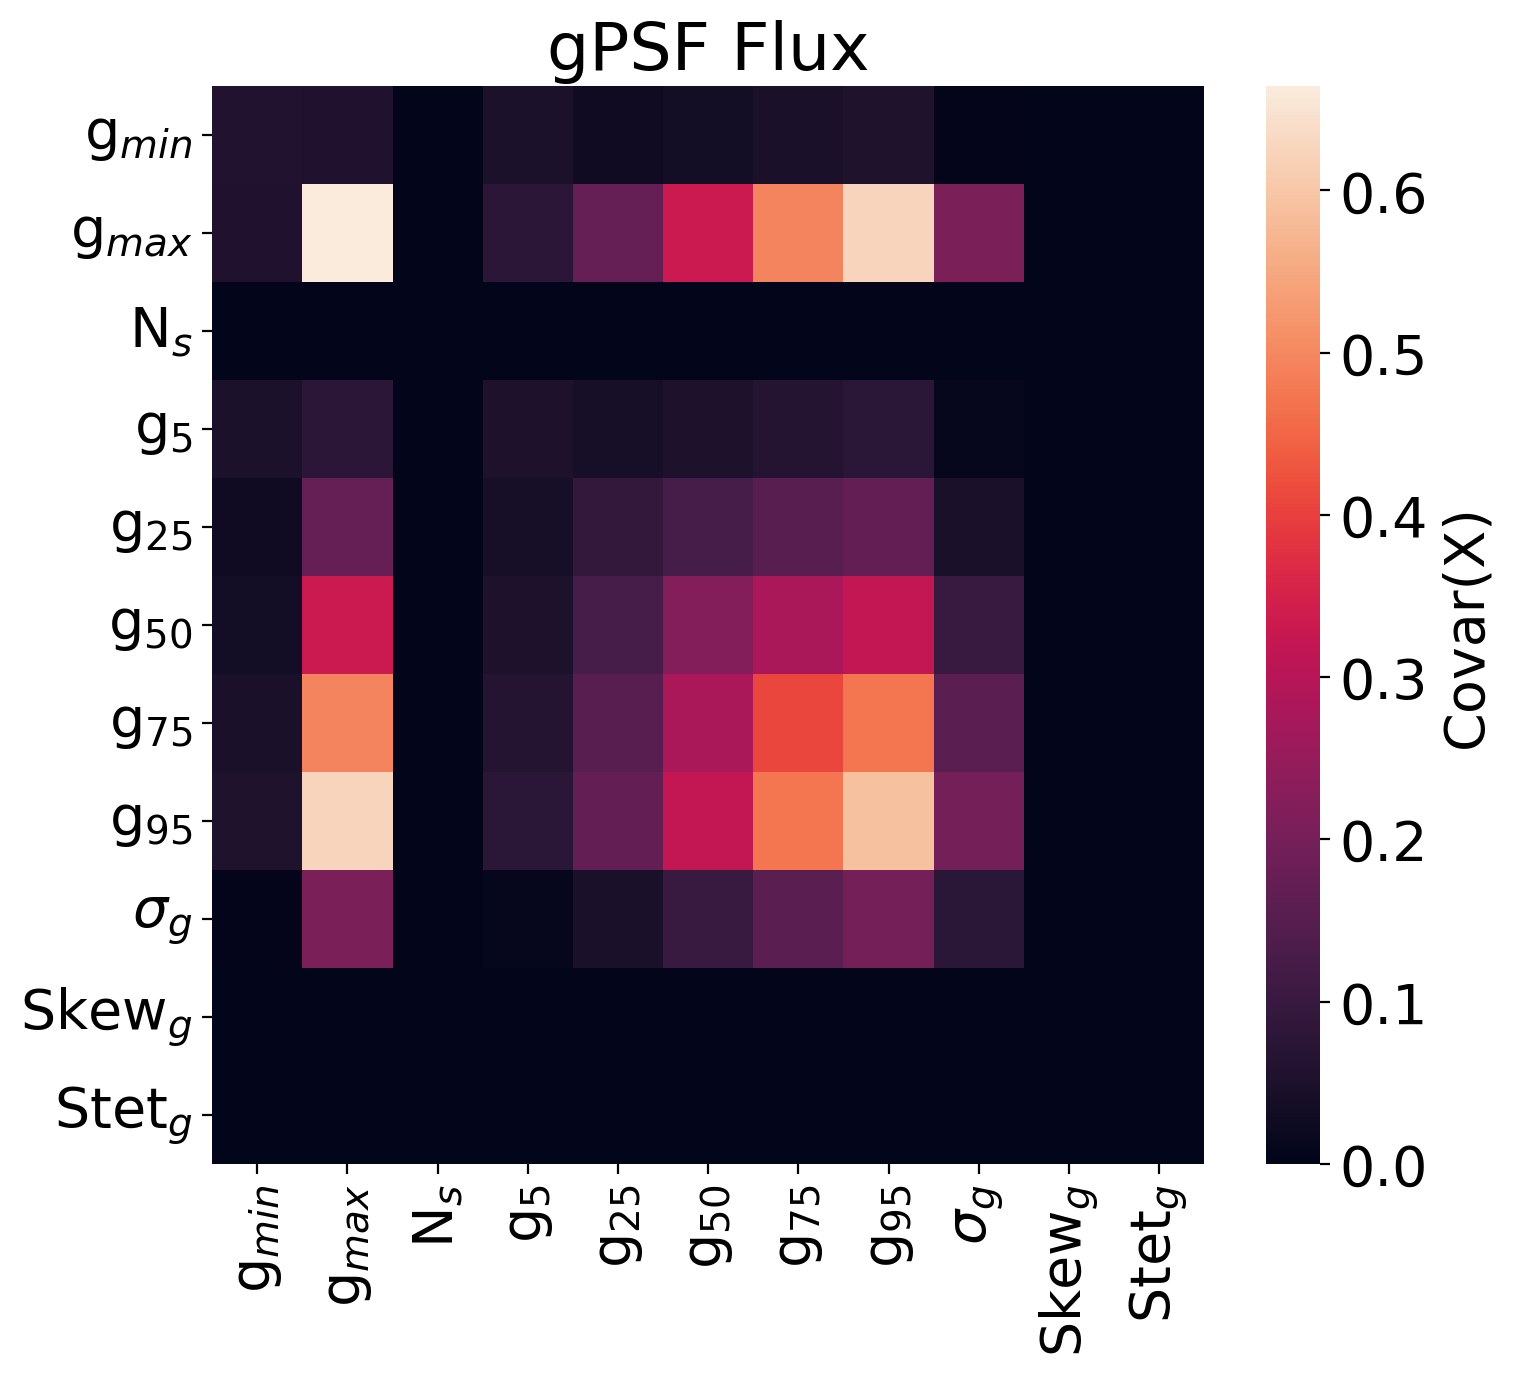

In [150]:
# plot the heatmap
plt.figure(figsize=(8, 7))
sns.heatmap(cc/1e12, 
        xticklabels=labels,
        yticklabels=labels,
           edgecolor='k', cbar_kws={'label': 'Covar(X)'})
plt.title('gPSF Flux')


In [39]:
stdsc = StandardScaler()

In [40]:
XX = [r1['g25'].data.data, r1['g50'].data.data, r1['g75'].data.data, r1['g95'].data.data]

In [41]:
XX = np.array(XX)

In [51]:
XX.T

array([[20.34311135, 16.10671411, 15.76233822, 15.551322  ],
       [        nan, 18.89182902, 18.76481389, 18.67365064],
       [        nan,         nan,         nan,         nan],
       [        nan, 23.90245392, 23.44983008, 22.75633338],
       [        nan, 16.57014989, 16.5065674 , 16.47093447],
       [17.60196689, 16.7461583 , 15.93717938, 15.91040552],
       [23.78254457, 23.27700511, 22.45441408, 22.11617821],
       [        nan, 24.5125849 , 22.90029159, 22.2530137 ],
       [        nan,         nan, 22.80686992, 22.01107525],
       [        nan,         nan,         nan, 24.76289979],
       [20.00026237, 19.88194674, 19.74525321, 19.6008736 ],
       [19.93114162, 19.84859591, 19.72040775, 19.61561363],
       [19.4851877 , 19.37470388, 19.25402702, 19.13347267],
       [        nan,         nan,         nan,         nan],
       [        nan,         nan,         nan, 23.71911777],
       [        nan,         nan, 23.99489062, 22.32653332]])

In [58]:
X_std = stdsc.fit_transform(XX.T)
cov_mat = np.cov(X_std.T)


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-5.1.0/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-5.1.0/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


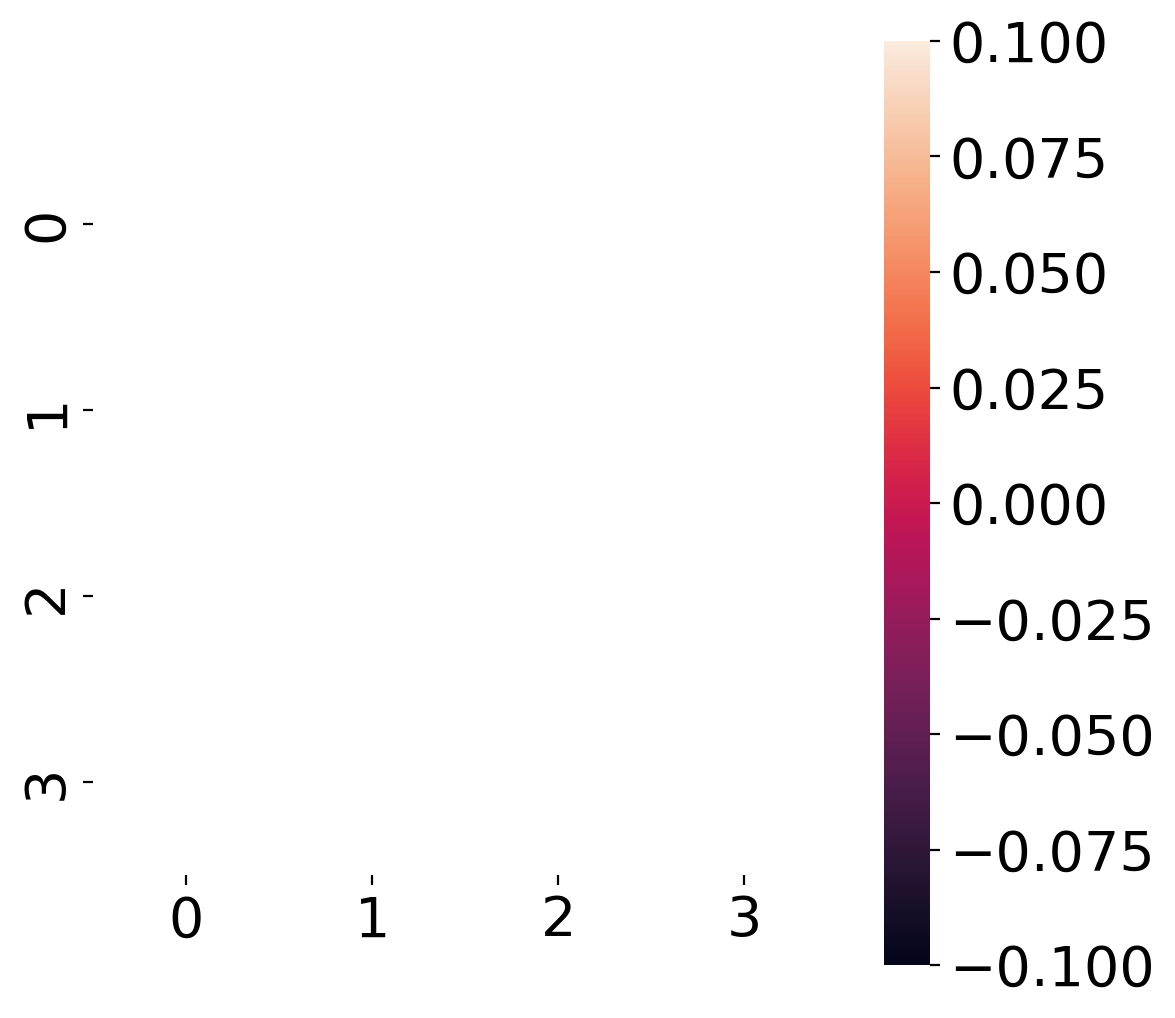

In [59]:
import seaborn as sns
plt.figure(figsize=(6,6))

hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True)

In [49]:
XX.shape

(4, 16)